<center><h1>Customer Acquisition : Credit Card Business</h1></center>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import display, Markdown
def customprint(text):
    display(Markdown(text))

## Data Load

In [18]:
demo_graph_df = pd.read_csv("Demographic data.csv")
credit_bureau_df = pd.read_csv("Credit Bureau data.csv")

In [19]:
demo_graph_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [20]:
credit_bureau_df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [21]:
print(demo_graph_df.shape)
demo_graph_df.info()

(71295, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage

In [22]:
print(credit_bureau_df.shape)
credit_bureau_df.info()

(71295, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null i

## Data Cleaning

Change column name for better readability as well as easier to access.

In [23]:
col = {'Marital Status (at the time of application)' : 'Marital Status',
       'No of months in current residence' : 'Months in Current Residence',
       'No of months in current company' : 'Months in Current Company',
       'Profession ' : 'Profession',
       'Performance Tag' : 'Defaulter'      
      }
demo_graph_df.rename(columns=col, inplace=True)

In [24]:
col = {'No of times 30 DPD or worse in last 6 months' : '30 DPD in 6M',
       'No of times 60 DPD or worse in last 6 months' : '60 DPD in 6M',
       'No of times 90 DPD or worse in last 6 months' : '90 DPD in 6M',
       'No of times 30 DPD or worse in last 12 months' : '30 DPD in 12M',
       'No of times 60 DPD or worse in last 12 months' : '60 DPD in 12M',
       'No of times 90 DPD or worse in last 12 months' : '90 DPD in 12M',
       'Avgas CC Utilization in last 12 months' : 'CC Utilization in 12M',
       'No of trades opened in last 6 months' : 'Trades Opened in 6M',
       'No of trades opened in last 12 months' : 'Trades Opened in 12M',
       'No of PL trades opened in last 6 months' : 'PL Trades Opened in 6M',
       'No of PL trades opened in last 12 months' : 'PL Trades Opened in 12M',
       'No of Inquiries in last 6 months (excluding home & auto loans)' : 'Inquiries in 6M',
       'No of Inquiries in last 12 months (excluding home & auto loans)' : 'Inquiries in 12M',
       'Performance Tag' : 'Defaulter'       
      }
credit_bureau_df.rename(columns=col, inplace=True)

In [25]:
credit_bureau_df.isnull().sum() / credit_bureau_df.index.size * 100

Application ID                0.000000
90 DPD in 6M                  0.000000
60 DPD in 6M                  0.000000
30 DPD in 6M                  0.000000
90 DPD in 12M                 0.000000
60 DPD in 12M                 0.000000
30 DPD in 12M                 0.000000
CC Utilization in 12M         1.483975
Trades Opened in 6M           0.001403
Trades Opened in 12M          0.000000
PL Trades Opened in 6M        0.000000
PL Trades Opened in 12M       0.000000
Inquiries in 6M               0.000000
Inquiries in 12M              0.000000
Presence of open home loan    0.381513
Outstanding Balance           0.381513
Total No of Trades            0.000000
Presence of open auto loan    0.000000
Defaulter                     1.998738
dtype: float64

In [26]:
demo_graph_df.isnull().sum() / demo_graph_df.index.size * 100

Application ID                 0.000000
Age                            0.000000
Gender                         0.002805
Marital Status                 0.008416
No of dependents               0.004208
Income                         0.000000
Education                      0.166912
Profession                     0.019637
Type of residence              0.011221
Months in Current Residence    0.000000
Months in Current Company      0.000000
Defaulter                      1.998738
dtype: float64

**2%** missing values in **Defaulter** which is out target/dependend variable.<BR><BR>
Here our assumption is missing value of defaulter means customer application was rejected by financial institue, it means these are ot good customers.<BR>
So, will mark these rejected customers as Defaulters.

In [27]:
credit_bureau_df['Defaulter'] = credit_bureau_df.apply(lambda x : 1 if np.isnan(x['Defaulter']) else x['Defaulter'], axis = 1)
demo_graph_df['Defaulter'] = credit_bureau_df['Defaulter']

In [28]:
demo_graph_df.isnull().sum()

Application ID                   0
Age                              0
Gender                           2
Marital Status                   6
No of dependents                 3
Income                           0
Education                      119
Profession                      14
Type of residence                8
Months in Current Residence      0
Months in Current Company        0
Defaulter                        0
dtype: int64

Still we have few missing value columns, obervation count is not very high, so lets drop these values.  

In [29]:
demo_graph_df.dropna(inplace=True)

In [30]:
demo_graph_df[['Age', 'Income', 'Months in Current Residence','Months in Current Company']].describe(percentiles=np.arange(0.1,1,0.1))

,Age,Income,Months in Current Residence,Months in Current Company
count,71144.000000,71144.000000,71144.000000,71144.000000
mean,44.951999,27.200291,34.551782,33.954416
std,9.935694,15.512129,36.758131,20.410721
min,-3.000000,-0.500000,6.000000,3.000000
10%,31.000000,6.000000,6.000000,6.000000
20%,36.000000,11.000000,6.000000,13.000000
30.0%,39.000000,16.000000,6.000000,20.000000
40%,42.000000,21.000000,6.000000,27.000000
50%,45.000000,27.000000,11.000000,34.000000
60%,48.000000,32.000000,29.000000,40.000000


Imcome as well age contains negative values, which is not correct.

In [31]:
demo_graph_df[demo_graph_df['Age'] <= 18].groupby(by=['Age', 'Marital Status'])[['Application ID']].count()

Application ID
Age Marital Status                
-3  Married                      1
 0  Married                     12
    Single                       4
 15 Married                      6
    Single                       6
 16 Married                      5
    Single                       6
 17 Married                     14
    Single                       8
 18 Married                     10
    Single                      13

-3 & 0 is definately some data issue, will replace this value using applicant profile variable like Education, Profession,etc.<BR><BR>
Few more data issue identified, like there are applicant with age less than 18 but taged as married which again raise question on data quality.<BR>

In [32]:
#Update incorrect age using Gender, Marital Status, Education & Profession
for i in demo_graph_df[demo_graph_df['Age'] < 18].index:
    gender = demo_graph_df.loc[i, 'Gender']
    education = demo_graph_df.loc[i, 'Education']
    profession = demo_graph_df.loc[i, 'Profession']
    maritalStatus = demo_graph_df.loc[i, 'Marital Status']
    
    demo_graph_df.loc[i, 'Age'] = demo_graph_df[(demo_graph_df['Gender'] == gender)
                                            & (demo_graph_df['Education'] == education)
                                            & (demo_graph_df['Profession'] == profession)
                                            & (demo_graph_df['Marital Status'] == maritalStatus)]['Age'].mode()[0]

In [33]:
#Update incorrect age using Gender, Education, Profession and Age
for i in demo_graph_df[demo_graph_df['Income'] <= 0].index:
    gender = demo_graph_df.loc[i, 'Gender']
    education = demo_graph_df.loc[i, 'Education']
    profession = demo_graph_df.loc[i, 'Profession']
    age = demo_graph_df.loc[i, 'Age']    
    demo_graph_df.loc[i, 'Income'] = demo_graph_df[(demo_graph_df['Gender'] == gender)
                                            & (demo_graph_df['Education'] == education)
                                            & (demo_graph_df['Profession'] == profession)
                                            & (demo_graph_df['Age'] >= age - 5)
                                            & (demo_graph_df['Age'] <= age + 5)]['Income'].mean()

In [34]:
credit_bureau_df.isnull().sum()

Application ID                   0
90 DPD in 6M                     0
60 DPD in 6M                     0
30 DPD in 6M                     0
90 DPD in 12M                    0
60 DPD in 12M                    0
30 DPD in 12M                    0
CC Utilization in 12M         1058
Trades Opened in 6M              1
Trades Opened in 12M             0
PL Trades Opened in 6M           0
PL Trades Opened in 12M          0
Inquiries in 6M                  0
Inquiries in 12M                 0
Presence of open home loan     272
Outstanding Balance            272
Total No of Trades               0
Presence of open auto loan       0
Defaulter                        0
dtype: int64

In [35]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull()) & (credit_bureau_df['Defaulter'] == 1)]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
13743,785171954,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
15121,130726109,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
17833,404543089,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
18333,746044170,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
19989,260054189,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
23109,415232032,0,0,0,0,0,0,NaN,0.0,0,0,0,1,2,NaN,NaN,0,0,1.0
24229,117453172,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
42673,51310669,0,0,0,0,0,0,NaN,0.0,0,0,0,2,2,NaN,NaN,0,0,1.0


In [36]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull())].describe()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,2.720000e+02,272.0,272.0,272.0,272.0,272.0,272.0,0.0,272.0,272.0,272.0,272.0,272.000000,272.000000,0.0,0.0,272.0,272.0,272.000000
mean,4.887308e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.183824,1.224265,NaN,NaN,0.0,0.0,0.029412
std,2.915627e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.503892,0.652330,NaN,NaN,0.0,0.0,0.169269
min,2.147690e+06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
25%,2.347238e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
50%,5.207258e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
75%,7.371681e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
max,9.978773e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.000000,5.000000,NaN,NaN,0.0,0.0,1.000000


**Average credit card utilization** is null menas no credit card issued to that customer so we can replace null with Zero.<BR>
Same case with **Presence of open home loan** & **Outstanding Balance**.

In [37]:
credit_bureau_df = credit_bureau_df.fillna(value=0)

In [38]:
credit_bureau_df.describe(percentiles=np.arange(0.1,1,0.1))

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,7.129500e+04,71295.000000,71295.000000,71295.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.256231,2.298015,5.826888,1.206901,2.397447,1.763532,3.535241,0.255446,1.244397e+06,8.186633,0.084620,0.061337
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.532455,2.070194,5.065096,1.352936,2.420086,1.971294,3.582199,0.436114,1.278753e+06,7.090776,0.278318,0.239949
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
10%,9.920720e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.708200e+03,2.000000,0.000000,0.000000
20%,1.990307e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.624600e+04,3.000000,0.000000,0.000000
30.0%,2.984054e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.888392e+05,4.000000,0.000000,0.000000
40%,3.993263e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.000000,5.864684e+05,5.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.734890e+05,6.000000,0.000000,0.000000
60%,5.986019e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2.000000,6.000000,1.000000,3.000000,2.000000,4.000000,0.000000,9.693564e+05,8.000000,0.000000,0.000000


**Derived Variable**

In [39]:
demo_graph_df['Income_Per_Dependent'] = demo_graph_df['Income'] / demo_graph_df['No of dependents']

In [40]:
credit_bureau_df['Have_Secured_Loan'] = credit_bureau_df.apply(lambda x : 1 if ((x['Presence of open home loan'] == 1) | (x['Presence of open auto loan'] == 1)) else 0  , axis = 1)

In [41]:
credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 20 columns):
Application ID                71295 non-null int64
90 DPD in 6M                  71295 non-null int64
60 DPD in 6M                  71295 non-null int64
30 DPD in 6M                  71295 non-null int64
90 DPD in 12M                 71295 non-null int64
60 DPD in 12M                 71295 non-null int64
30 DPD in 12M                 71295 non-null int64
CC Utilization in 12M         71295 non-null float64
Trades Opened in 6M           71295 non-null float64
Trades Opened in 12M          71295 non-null int64
PL Trades Opened in 6M        71295 non-null int64
PL Trades Opened in 12M       71295 non-null int64
Inquiries in 6M               71295 non-null int64
Inquiries in 12M              71295 non-null int64
Presence of open home loan    71295 non-null float64
Outstanding Balance           71295 non-null float64
Total No of Trades            71295 non-null int64
Presence of open

**Let's cap outliers and calculate Weight of Evidence & Information Value for both data sets.<BR>**

In [64]:
woe_demo_graph_df = demo_graph_df.copy()
woe_credit_bureau_df = credit_bureau_df.copy()

In [65]:
demo_graph_df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,Application ID,Age,No of dependents,Income,Months in Current Residence,Months in Current Company,Defaulter,Income_Per_Dependent
count,7.114400e+04,71144.000000,71144.000000,71144.000000,71144.000000,71144.000000,71144.000000,71144.000000
mean,4.989885e+08,44.978944,2.865301,27.240457,34.551782,33.954416,0.061368,12.888217
std,2.886101e+08,9.889064,1.382307,15.475790,36.758131,20.410721,0.240007,11.590902
min,1.004500e+05,18.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.200000
5%,4.981444e+07,29.000000,1.000000,4.500000,6.000000,3.000000,0.000000,1.500000
10%,9.920551e+07,31.000000,1.000000,6.000000,6.000000,6.000000,0.000000,2.250000
25%,2.483834e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000,5.000000
50%,4.976574e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000,9.400000
75%,7.496583e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000,16.500000
90%,8.995477e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,29.000000


In [66]:
woe_demo_graph_df['Age'] = pd.cut(demo_graph_df['Age'], bins=[18,20,25,30,40,50,60,70], include_lowest=True)
woe_demo_graph_df['Income'] = pd.cut(demo_graph_df['Income'], bins=[0,10,20,30,40,50,61], include_lowest=True)
woe_demo_graph_df['Income_Per_Dependent'] = pd.cut(demo_graph_df['Income_Per_Dependent'], bins=[0,10,20,30,40,50,61], include_lowest=True)
woe_demo_graph_df['Months in Current Company'] = pd.cut(demo_graph_df['Months in Current Company'], bins=[0,6,12,24,36,48,60,72,133], include_lowest=True)
woe_demo_graph_df['Months in Current Residence'] = pd.cut(demo_graph_df['Months in Current Residence'], bins=[0,6,12,24,36,48,60,72,84,96,108,120,132], include_lowest=True)

In [67]:
credit_bureau_df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter,Have_Secured_Loan
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.256231,2.298015,5.826888,1.206901,2.397447,1.763532,3.535241,0.255446,1.244397e+06,8.186633,0.084620,0.061337,0.316025
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.532455,2.070194,5.065096,1.352936,2.420086,1.971294,3.582199,0.436114,1.278753e+06,7.090776,0.278318,0.239949,0.464926
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,4.985653e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.471700e+03,1.000000,0.000000,0.000000,0.000000
10%,9.920720e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.708200e+03,2.000000,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.095350e+05,3.000000,0.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.734890e+05,6.000000,0.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.919376e+06,10.000000,0.000000,0.000000,1.000000
90%,8.994646e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.274014e+06,20.000000,0.000000,0.000000,1.000000


In [68]:
woe_credit_bureau_df['CC Utilization in 12M'] = pd.cut(credit_bureau_df['CC Utilization in 12M'], bins=[0,1,10,20,30,40,50,60,70,80,90,100,120], include_lowest=True)
woe_credit_bureau_df['Outstanding Balance'] = pd.cut(credit_bureau_df['Outstanding Balance'], bins=[0, 10000, 50000,100000,200000,300000,400000,500000,1000000,2000000,3000000,4000000,5000000,6000000], include_lowest=True)
woe_credit_bureau_df['Total No of Trades'] = pd.cut(credit_bureau_df['Total No of Trades'], bins=[0,5,10,15,20,25,30,35,45], include_lowest=True)
woe_credit_bureau_df['Trades Opened in 6M'] = pd.cut(credit_bureau_df['Trades Opened in 6M'], bins=[0,1,2,3,4,5,6,7,8,9,12], include_lowest=True)
woe_credit_bureau_df['Trades Opened in 12M'] = pd.cut(credit_bureau_df['Trades Opened in 12M'], bins=[0,2,4,6,8,10,12,14,16,18,20,28], include_lowest=True)
woe_credit_bureau_df['PL Trades Opened in 12M'] = pd.cut(credit_bureau_df['PL Trades Opened in 12M'], bins=[0,1,2,3,4,5,6,7,8,9,12], include_lowest=True)
woe_credit_bureau_df['Inquiries in 12M'] = pd.cut(credit_bureau_df['Inquiries in 12M'], bins=[0,2,4,6,8,10,12,14,16,18,20], include_lowest=True)

In [69]:
def Calculate_WOE_IV(data, feature, target):
    lst = []
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        lst.append({
            'Feature' : feature,
            'Category': val,
            'Total': data[data[feature] == val].count()[feature],
            'Non_Defaulter': data[(data[feature] == val) & (data[target] == 0)].count()[feature],
            'Defaulter': data[(data[feature] == val) & (data[target] == 1)].count()[feature]
        })
        
    df = pd.DataFrame(lst)
    df['Distr_Non_Defaulter'] = df['Non_Defaulter'] / df['Non_Defaulter'].sum()
    df['Distr_Defaulter'] = df['Defaulter'] / df['Defaulter'].sum()
    df['WOE'] = np.log(df['Distr_Non_Defaulter'] / df['Distr_Defaulter'])
    df = df.replace({'WOE': {np.inf: 0, -np.inf: 0}})
    
    df['IV'] = (df['Distr_Non_Defaulter'] - df['Distr_Defaulter']) * df['WOE']
    df = df.sort_values(by='WOE')
    
    return df

In [70]:
woe_iv_demo_graph = pd.DataFrame(columns=['Category', 'Defaulter', 'Feature', 'Non_Defaulter', 'Total', 'Distr_Non_Defaulter', 'Distr_Defaulter', 'WOE', 'IV'])
woe_iv_credit_bureau = pd.DataFrame(columns=['Category', 'Defaulter', 'Feature', 'Non_Defaulter', 'Total', 'Distr_Non_Defaulter', 'Distr_Defaulter', 'WOE', 'IV'])

for f in woe_demo_graph_df.columns.drop(labels=['Application ID','Defaulter']):
    woe_iv_demo_graph = woe_iv_demo_graph.append(Calculate_WOE_IV(woe_demo_graph_df, f, 'Defaulter'))
    
for f in woe_credit_bureau_df.columns.drop(labels=['Application ID','Defaulter']):
    woe_iv_credit_bureau = woe_iv_credit_bureau.append(Calculate_WOE_IV(woe_credit_bureau_df, f, 'Defaulter') )

In [71]:
woe_iv_demo_graph.reset_index(drop=True, inplace=True)
woe_iv_credit_bureau.reset_index(drop=True, inplace=True)

Now there are no missing values in data set.

**Duplicate Record** check

In [72]:
woe_demo_graph_df[woe_demo_graph_df.duplicated()]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter,Income_Per_Dependent


In [73]:
woe_credit_bureau_df[woe_credit_bureau_df.duplicated()]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter,Have_Secured_Loan


In [74]:
woe_demo_graph_df[woe_demo_graph_df['Application ID'].isin(woe_demo_graph_df[woe_demo_graph_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter,Income_Per_Dependent
5243,653287861,"(25.0, 30.0]",M,Married,3.0,"(20.0, 30.0]",Bachelor,SAL,Rented,"(108.0, 120.0]","(48.0, 60.0]",0.0,"(-0.001, 10.0]"
24386,765011468,"(50.0, 60.0]",M,Single,4.0,"(-0.001, 10.0]",Bachelor,SAL,Company provided,"(-0.001, 6.0]","(48.0, 60.0]",0.0,"(-0.001, 10.0]"
27586,765011468,"(30.0, 40.0]",M,Married,4.0,"(-0.001, 10.0]",Professional,SAL,Rented,"(-0.001, 6.0]","(60.0, 72.0]",0.0,"(-0.001, 10.0]"
42637,653287861,"(30.0, 40.0]",M,Married,5.0,"(30.0, 40.0]",Phd,SE,Rented,"(36.0, 48.0]","(36.0, 48.0]",1.0,"(-0.001, 10.0]"
48602,671989187,"(25.0, 30.0]",M,Married,2.0,"(30.0, 40.0]",Professional,SAL,Living with Parents,"(96.0, 108.0]","(6.0, 12.0]",0.0,"(10.0, 20.0]"
59022,671989187,"(50.0, 60.0]",M,Married,4.0,"(-0.001, 10.0]",Professional,SE,Rented,"(36.0, 48.0]","(-0.001, 6.0]",0.0,"(-0.001, 10.0]"


In [75]:
woe_credit_bureau_df[woe_credit_bureau_df['Application ID'].isin(woe_credit_bureau_df[woe_credit_bureau_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter,Have_Secured_Loan
5243,653287861,0,0,0,0,0,0,"(10.0, 20.0]","(-0.001, 1.0]","(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 2.0]",0.0,"(10000.0, 50000.0]","(-0.001, 5.0]",0,0.0,0
24386,765011468,0,0,0,0,0,0,"(10.0, 20.0]","(-0.001, 1.0]","(-0.001, 2.0]",0,"(-0.001, 1.0]",2,"(-0.001, 2.0]",0.0,"(200000.0, 300000.0]","(-0.001, 5.0]",0,0.0,0
27586,765011468,0,0,0,0,0,0,"(10.0, 20.0]","(-0.001, 1.0]","(2.0, 4.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]",0.0,"(10000.0, 50000.0]","(5.0, 10.0]",0,0.0,0
42637,653287861,1,1,1,2,2,2,"(100.0, 120.0]","(1.0, 2.0]","(4.0, 6.0]",1,"(2.0, 3.0]",1,"(2.0, 4.0]",0.0,"(500000.0, 1000000.0]","(5.0, 10.0]",0,1.0,0
48602,671989187,1,2,3,2,2,3,"(60.0, 70.0]","(1.0, 2.0]","(4.0, 6.0]",1,"(3.0, 4.0]",3,"(4.0, 6.0]",0.0,"(500000.0, 1000000.0]","(5.0, 10.0]",1,0.0,1
59022,671989187,0,1,2,0,2,3,"(70.0, 80.0]","(2.0, 3.0]","(6.0, 8.0]",1,"(3.0, 4.0]",2,"(4.0, 6.0]",0.0,"(500000.0, 1000000.0]","(5.0, 10.0]",0,0.0,0


**Application ID** should be unique for each records, but in dataset we have 3 application id's repeated.<BR>
Data points associcated with these applications are completely different, so will keep these records as is for further analysis.

## EDA

### Univariate & Bivariate Analysis

In [76]:
def PlotNumericalFeatures(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18, 4))
    
    #Plot All Records
    ax = sns.distplot(df[col], ax = axes[0])
    ax.set_title(col)
    
    #Plot Only Non Defaulters
    ax = sns.distplot(df[df['Defaulter']==0][col],ax = axes[1])
    ax.set_title('Non Defaulter')
    
    #Plot Only Defaulters
    ax = sns.distplot(df[df['Defaulter']==1][col], ax = axes[2])
    ax.set_title('Defaulter')

    #Plot Defauletr vs Non-defaulter
    ax = sns.boxplot(x='Defaulter', y=col, data=df, ax = axes[3])
    ax = sns.stripplot(x='Defaulter', y=col, data=df, jitter=True, ax = axes[3])
    ax.set_title('Non Defaulter Vs Defaulter')
    plt.show()

In [77]:
def PlotCategoricalFeatures(df, col, graphSize =(15,6), bbox=[0, 0, 2.5, 0.9]):
    No_of_Application = df.groupby(col)['Defaulter'].count().reset_index(name = 'No of Application')
    No_of_Defaulter = df[df['Defaulter']==1].groupby(col)['Defaulter'].count().reset_index(name = 'No of Defaulter')
    tempDf = No_of_Application.merge(No_of_Defaulter, how='left', on=col)
    tempDf['No of Defaulter'].fillna(0, inplace=True)
    tempDf['% Defaulter in Category'] = round(100*(tempDf['No of Defaulter']/tempDf['No of Application']), 2)
    tempDf['% Defaulter in All Defaultor'] = round(100*(tempDf['No of Defaulter']/len(df[df['Defaulter'] == 1])), 2)
    tempDf[col] = tempDf[col].astype('category')
    fig = plt.figure(figsize= graphSize)
    
    colOrder = sorted(df[col].unique())
    ax = fig.add_subplot(221)
    sns.countplot(data=df, y=col, hue='Defaulter', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)

    ax = fig.add_subplot(222)
    sns.barplot(data=tempDf, y=col, x='% Defaulter in Category', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)
    ax.set_ylabel("")
    ax.set_yticklabels("")

    ax = fig.add_subplot(223)
    mpl_table = ax.table(cellText = tempDf.values, bbox=bbox, colLabels=tempDf.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(14)
    ax.axis('off')
    plt.show()

In [78]:
woe_demo_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71144 entries, 0 to 71294
Data columns (total 13 columns):
Application ID                 71144 non-null int64
Age                            71144 non-null category
Gender                         71144 non-null object
Marital Status                 71144 non-null object
No of dependents               71144 non-null float64
Income                         71144 non-null category
Education                      71144 non-null object
Profession                     71144 non-null object
Type of residence              71144 non-null object
Months in Current Residence    71144 non-null category
Months in Current Company      71144 non-null category
Defaulter                      71144 non-null float64
Income_Per_Dependent           71144 non-null category
dtypes: category(5), float64(2), int64(1), object(5)
memory usage: 5.2+ MB


In [79]:
woe_credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 20 columns):
Application ID                71295 non-null int64
90 DPD in 6M                  71295 non-null int64
60 DPD in 6M                  71295 non-null int64
30 DPD in 6M                  71295 non-null int64
90 DPD in 12M                 71295 non-null int64
60 DPD in 12M                 71295 non-null int64
30 DPD in 12M                 71295 non-null int64
CC Utilization in 12M         71295 non-null category
Trades Opened in 6M           71295 non-null category
Trades Opened in 12M          71295 non-null category
PL Trades Opened in 6M        71295 non-null int64
PL Trades Opened in 12M       71295 non-null category
Inquiries in 6M               71295 non-null int64
Inquiries in 12M              71295 non-null category
Presence of open home loan    71295 non-null float64
Outstanding Balance           71295 non-null category
Total No of Trades            71295 non-null category
P

Credit bureau data contains all numerical feature variable, where as Demographic data have some categorical feature variable.  

Analyze **Demographic** data.

**Defaulter** : Check for class imbalance 

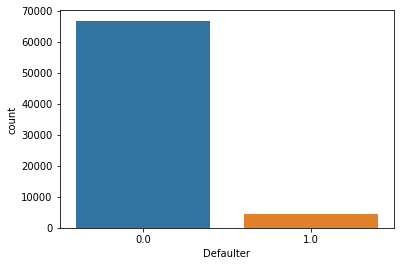

0.0    93.863151
1.0     6.136849
Name: Defaulter, dtype: float64

In [80]:
#Data imbalance check on Target Variable
sns.countplot(data=woe_demo_graph_df, x='Defaulter')
plt.show()
woe_demo_graph_df['Defaulter'].value_counts() / woe_demo_graph_df.index.size*100

**Information Value**

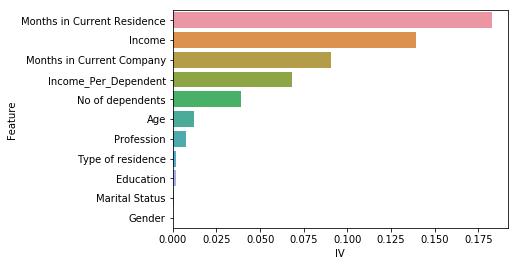

,IV
Feature,
Months in Current Residence,0.182606
Income,0.139102
Months in Current Company,0.090508
Income_Per_Dependent,0.068326
No of dependents,0.039303
Age,0.012360
Profession,0.007569
Type of residence,0.001889
Education,0.001575


In [81]:
iv_demo_graph_df = woe_iv_demo_graph.groupby(by='Feature')[['IV']].sum().sort_values(by='IV', ascending= False)
sns.barplot(data=iv_demo_graph_df,y = iv_demo_graph_df.index,  x='IV',)
plt.show()
iv_demo_graph_df

**Months in Current Residence(0.18), Income(0.13)** varibale have **Medium Predictor Power**<BR>
Where as **Months in Current Company(0.09), Income_Per_Dependent(0.07) & No of dependents(0.04)** variables are **Weak Predictors**.<BR>
Remaning variables are not usefull for Prediction.

**Age**

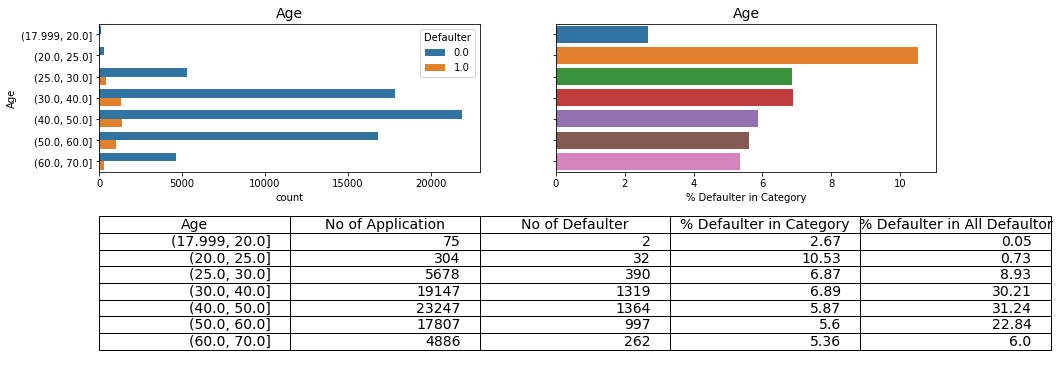

In [82]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Age')

Most of the defaulters (**~84%**) are from age band of 30 to 60, which also have high number of applicants.<BR>
If we compare withing category defaulter ration, then there are **11%** of defaulters within category of age group 20-25.

**Gender**

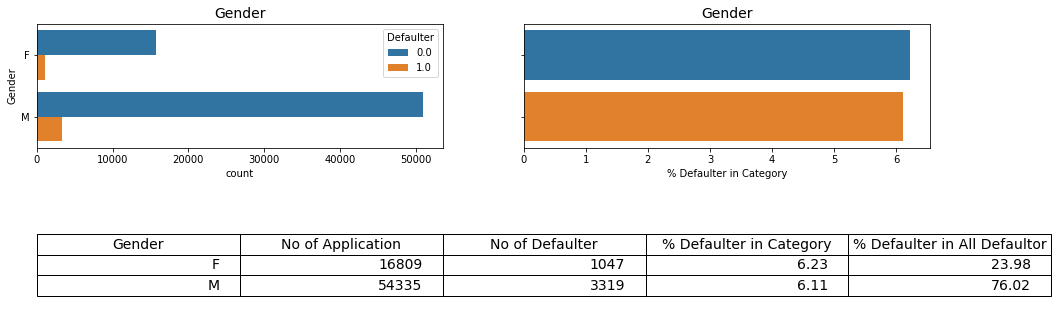

In [83]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Gender', graphSize=(16,5), bbox=[0, 0, 2.5, 0.5])

Though we have more records for **Male** than **Female**, but default rate for both categories are almost same.  

**Marital Status**

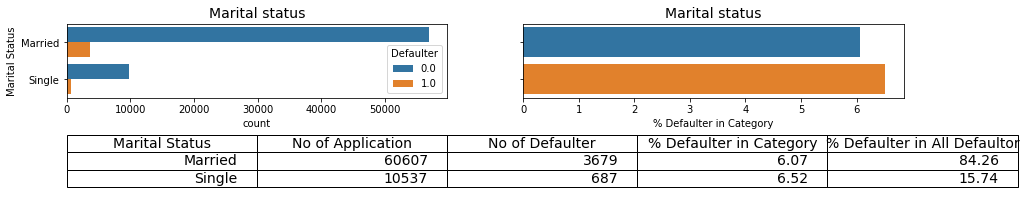

In [84]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Marital Status', graphSize=(15,3), bbox=[0, 0, 2.5, 0.7])

Same as gender, defaulter rate for Married & Single is same.

**No of dependents**

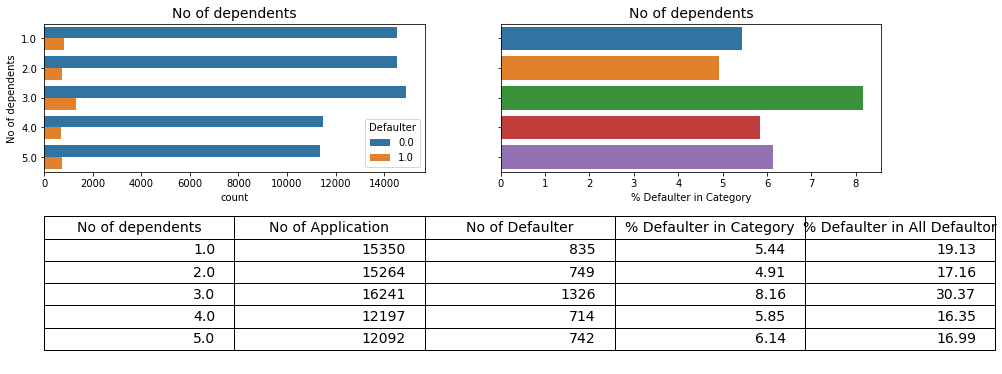

In [85]:
PlotCategoricalFeatures(woe_demo_graph_df, 'No of dependents')

Applicant with 3 dependent have more chance to default.

**Education**

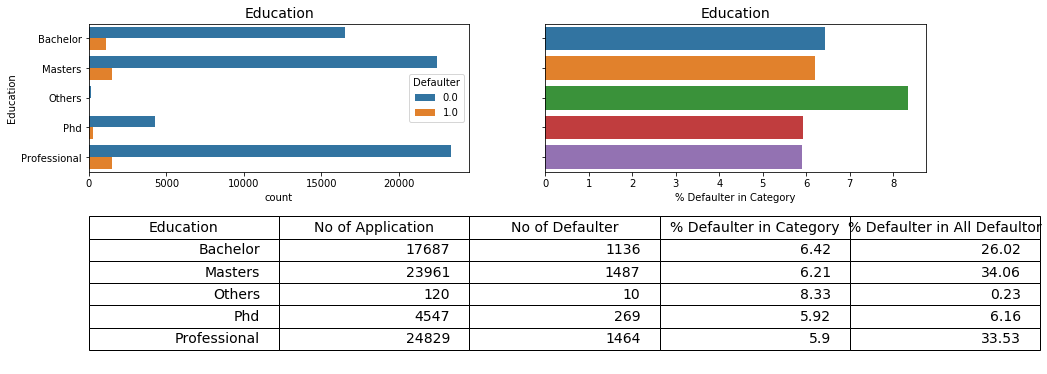

In [86]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Education')

Others category have very less records but have high defaulter rate.

**Profession**

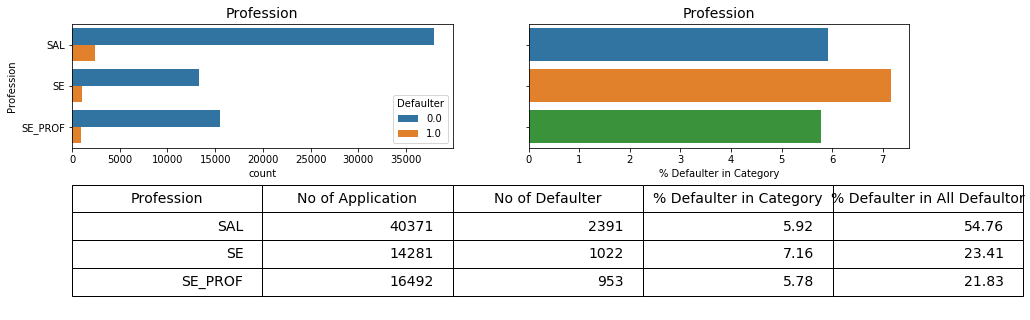

In [87]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Profession',graphSize=(15,5))

**Type of residence**

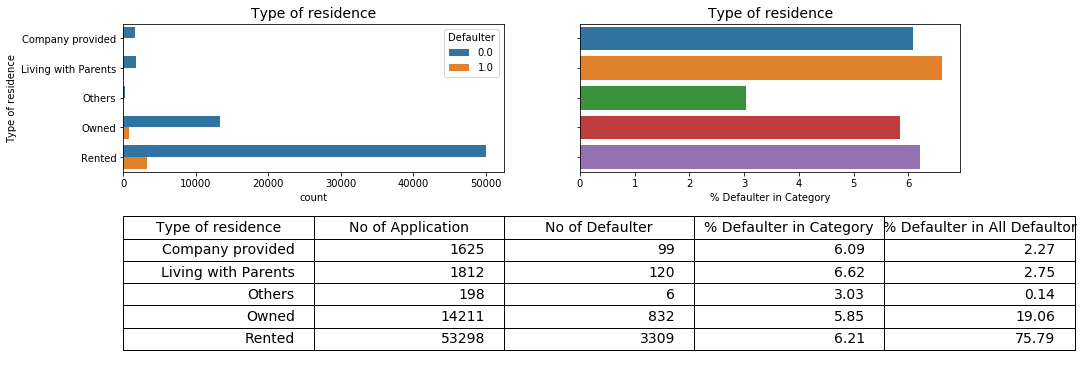

In [88]:
PlotCategoricalFeatures(demo_graph_df, 'Type of residence')

**Income Per Dependent**

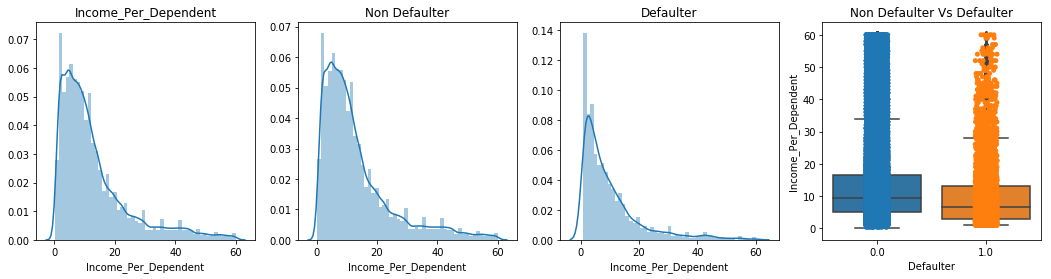

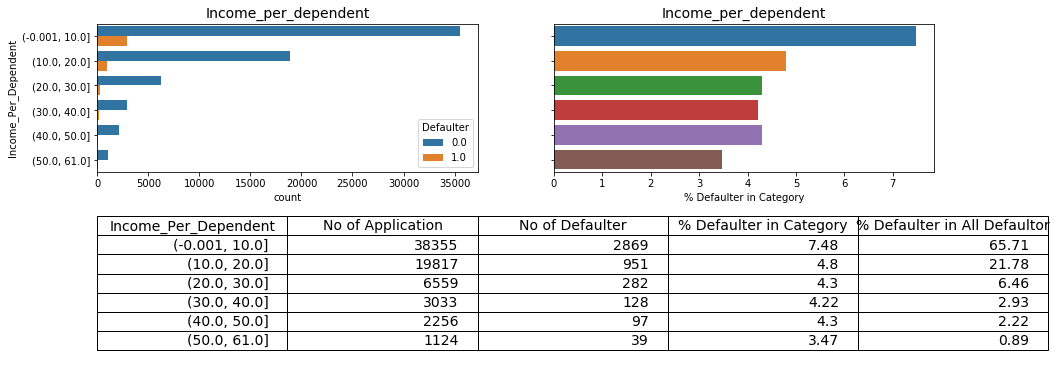

In [89]:
PlotNumericalFeatures(demo_graph_df, 'Income_Per_Dependent')
PlotCategoricalFeatures(woe_demo_graph_df, 'Income_Per_Dependent')

As per expectation there more number of defaulters when Income Per Dependent is low.

**Income**

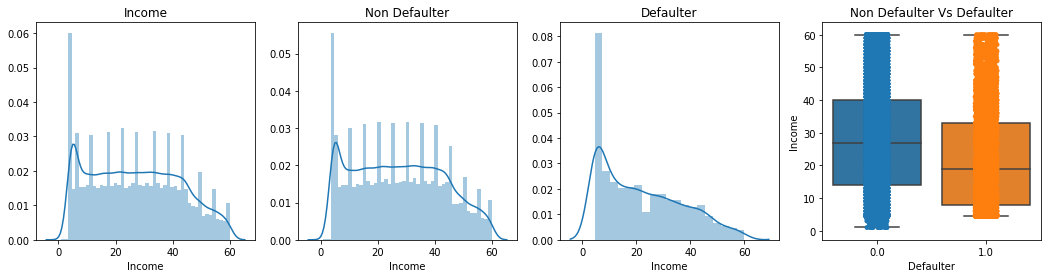

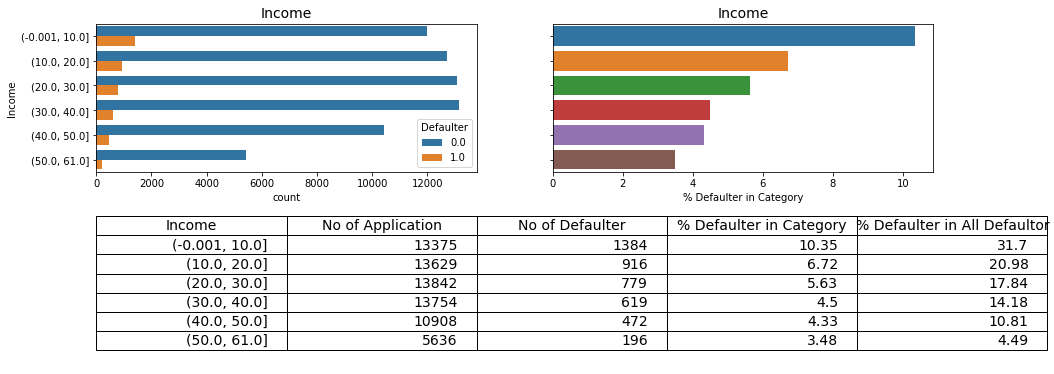

In [90]:
PlotNumericalFeatures(demo_graph_df, 'Income')
PlotCategoricalFeatures(woe_demo_graph_df, 'Income')

As per Information Value score Income is top predictor.<BR>
Low income group have high chance of defaulting.

**Months in Current Residence**

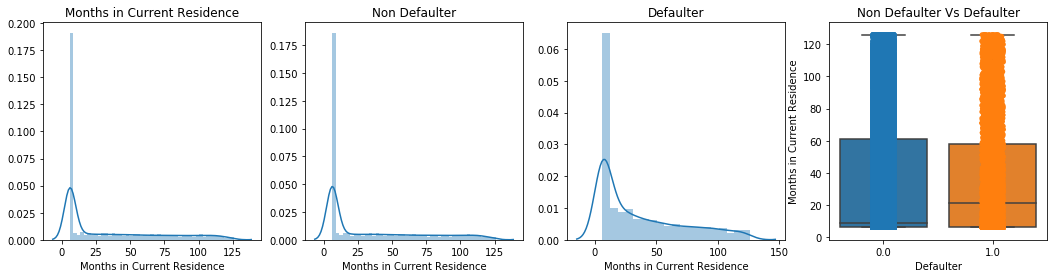

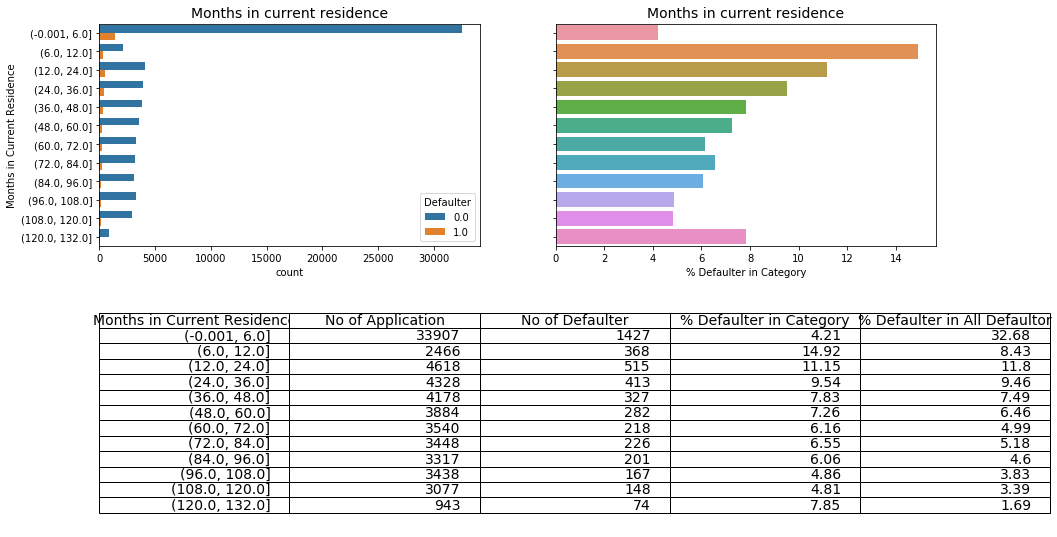

In [91]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Residence')
PlotCategoricalFeatures(woe_demo_graph_df, 'Months in Current Residence', graphSize=(15,9))

**Months in Currrent residence** variable is highly right skewed.<BR>
Applicant with **6 to 24 months in current residance** have more defaulter rate.

**Months in Current Company**

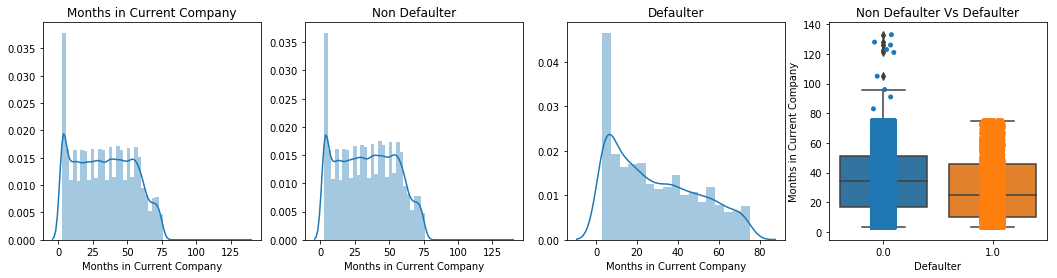

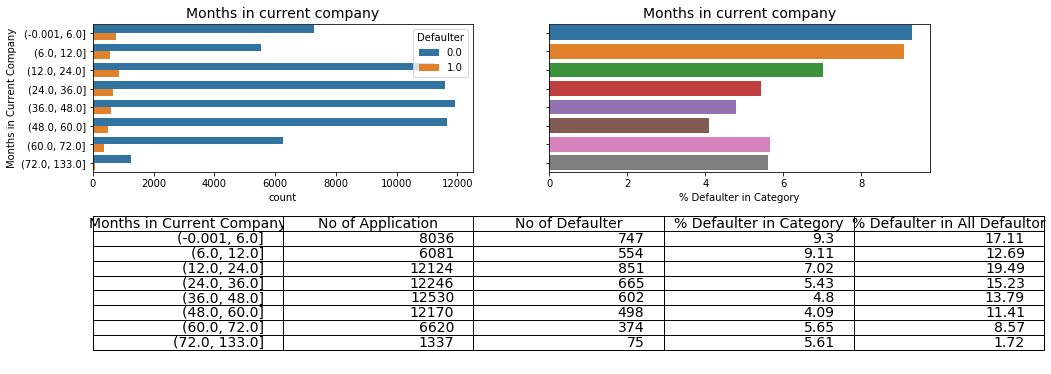

In [92]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Company')
PlotCategoricalFeatures(woe_demo_graph_df, 'Months in Current Company')

There are few outliers monstly in non defaulter category.<BR>


Analyze **Credit Bureau** data.

In [93]:
credit_bureau_df.describe()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter,Have_Secured_Loan
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.256231,2.298015,5.826888,1.206901,2.397447,1.763532,3.535241,0.255446,1.244397e+06,8.186633,0.084620,0.061337,0.316025
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.532455,2.070194,5.065096,1.352936,2.420086,1.971294,3.582199,0.436114,1.278753e+06,7.090776,0.278318,0.239949,0.464926
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.095350e+05,3.000000,0.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.734890e+05,6.000000,0.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.919376e+06,10.000000,0.000000,0.000000,1.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000,1.000000


**Information Value**

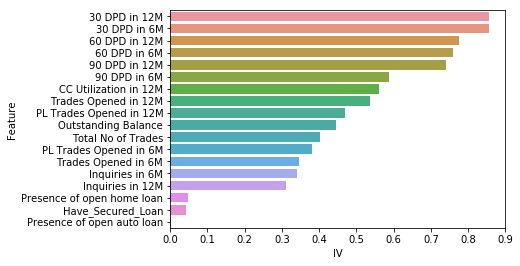

,IV
Feature,
30 DPD in 12M,0.856121
30 DPD in 6M,0.855173
60 DPD in 12M,0.774534
60 DPD in 6M,0.760158
90 DPD in 12M,0.740845
90 DPD in 6M,0.586412
CC Utilization in 12M,0.561875
Trades Opened in 12M,0.536770
PL Trades Opened in 12M,0.470251


In [94]:
iv_credit_bureau_df = woe_iv_credit_bureau.groupby(by='Feature')[['IV']].sum().sort_values(by='IV', ascending= False)
sns.barplot(iv_credit_bureau_df['IV'],iv_credit_bureau_df.index)
plt.show()
iv_credit_bureau_df

**All DPD (Days Past Due) variable are Very Strong predictors (>0.6)**<BR>
Apart from DPD variable **Credit Card Utilization, Trade Opened in 12M, Personal Loan Treads Opened in 12M, Inquiries in 12M** are strong predictors with information value greater tha 0.5<BR> 
**Months in Current Residence(0.18) & Income(0.13)** variable have **Medium Predictor Power**<BR><BR>
**Presence of open home loan, Presence of open auto loan** variable scores very less which indicates they are not useful for prediction.


**30 DPD in 6M, 60 DPD in 6M & 90 DPD in 6M**

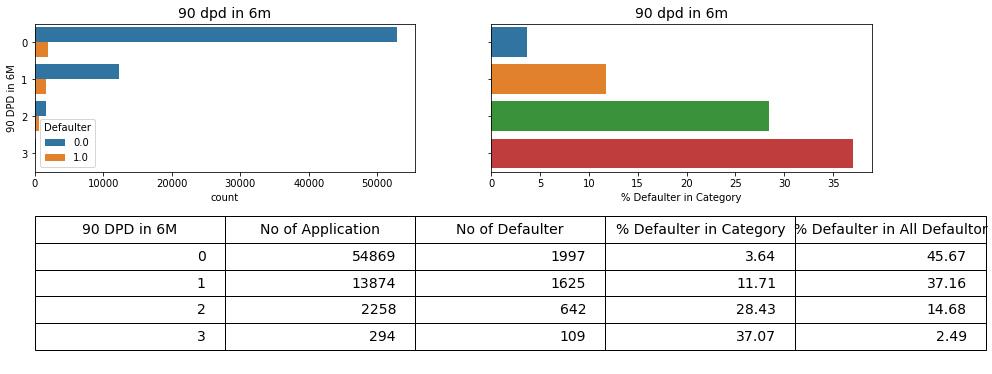

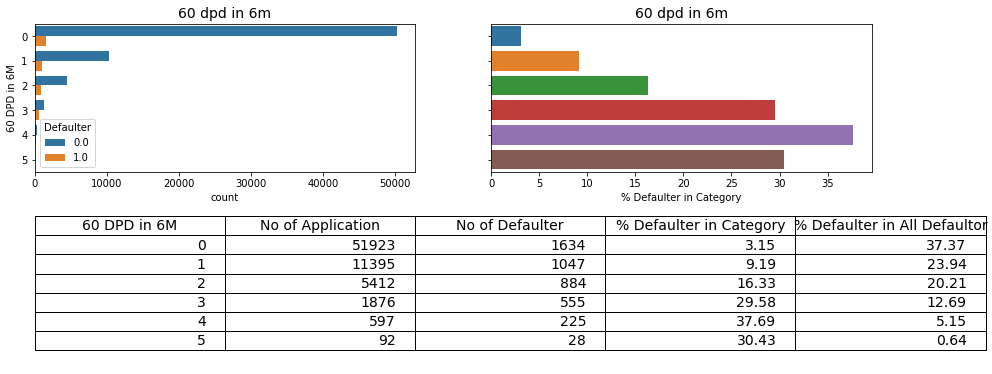

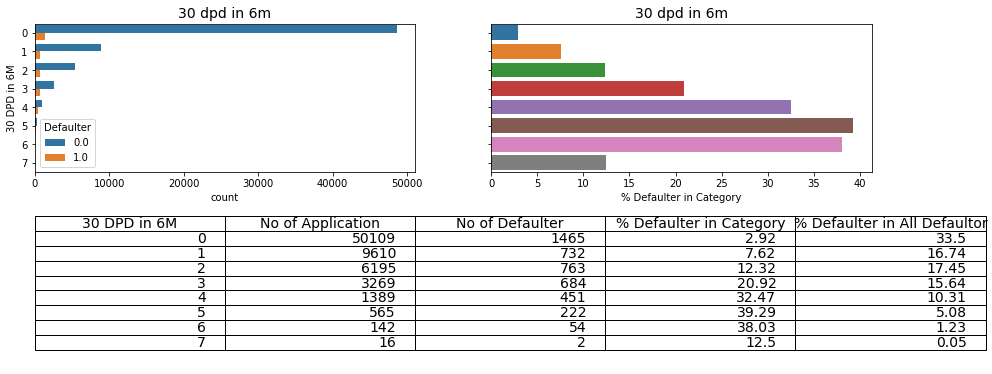

In [95]:
PlotCategoricalFeatures(woe_credit_bureau_df, '90 DPD in 6M')
PlotCategoricalFeatures(woe_credit_bureau_df, '60 DPD in 6M')
PlotCategoricalFeatures(woe_credit_bureau_df, '30 DPD in 6M')

Defaultor rate increase as number of days past due increases.

**30 DPD in 12M, 60 DPD in 12M & 90 DPD in 12M**

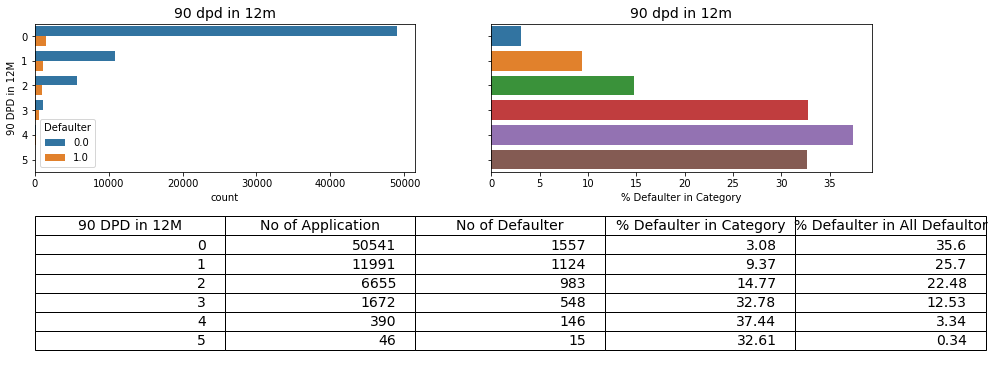

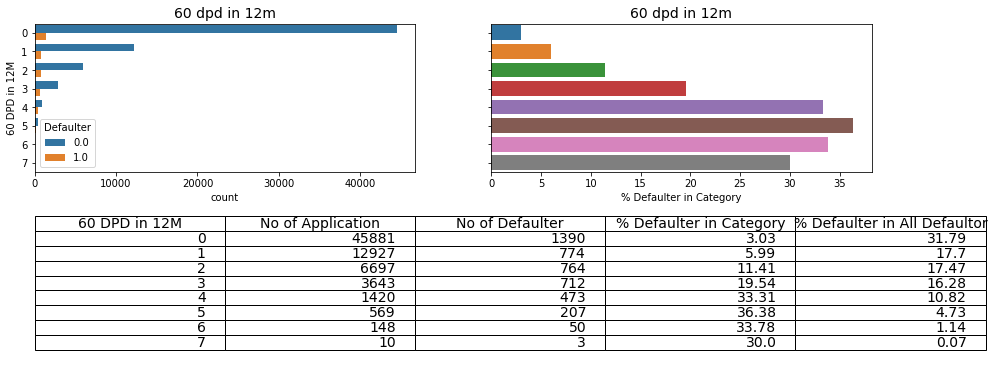

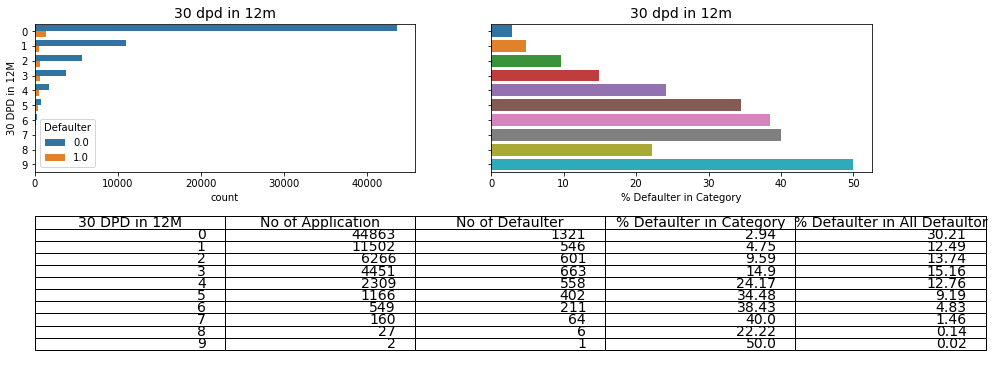

In [96]:
PlotCategoricalFeatures(woe_credit_bureau_df, '90 DPD in 12M')
PlotCategoricalFeatures(woe_credit_bureau_df, '60 DPD in 12M')
PlotCategoricalFeatures(woe_credit_bureau_df, '30 DPD in 12M')

Similar trend like 6M DPD data.<BR>
If applicant crossed 90 DPD multiple times than there are high chance of applicant being defaulter.

**Average Credit Card Utilization in 12M**

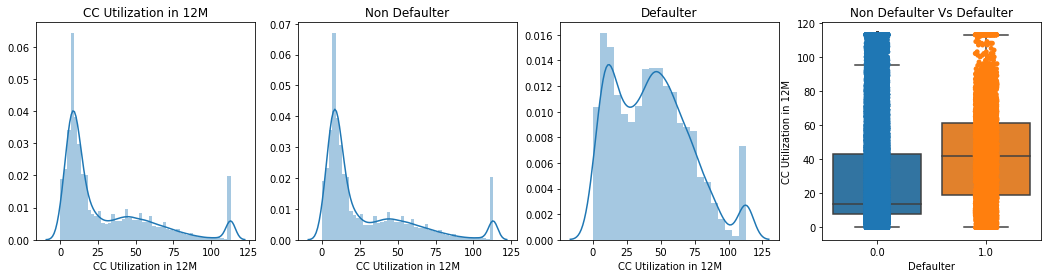

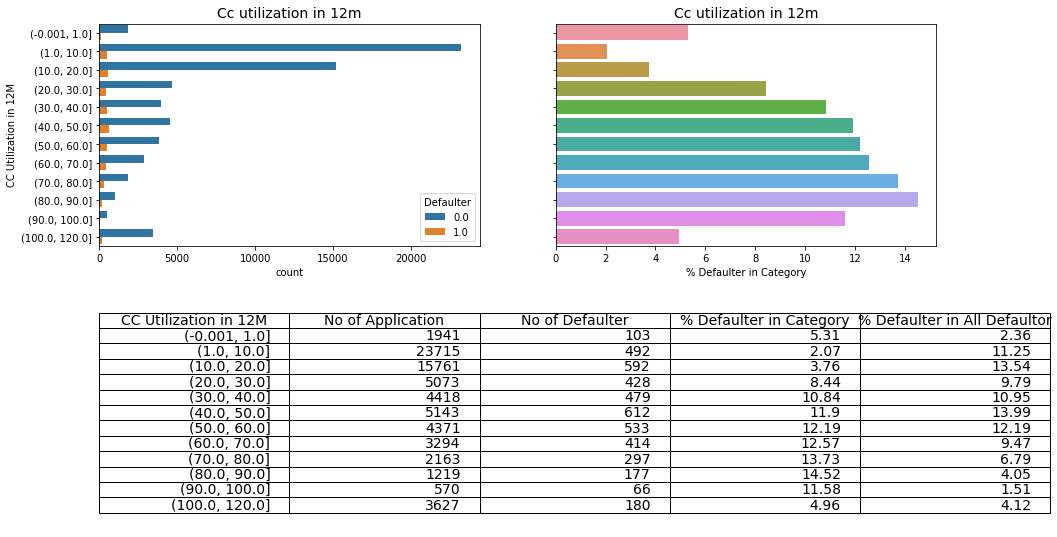

In [97]:
PlotNumericalFeatures(credit_bureau_df, 'CC Utilization in 12M')
PlotCategoricalFeatures(woe_credit_bureau_df, 'CC Utilization in 12M', graphSize=(15,9))

**Number of Trades Opened in 6M & Number of Trades Opened in 12M**

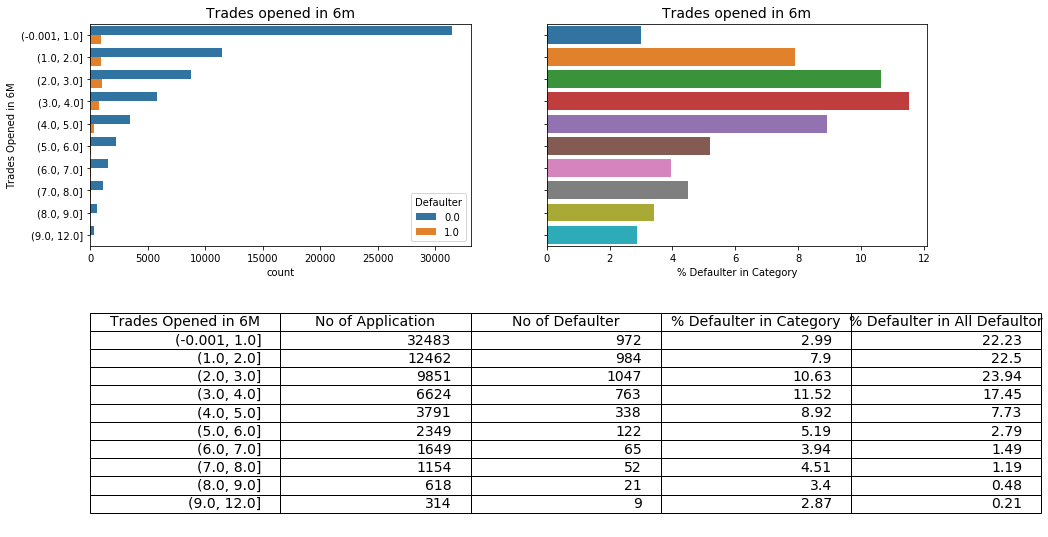

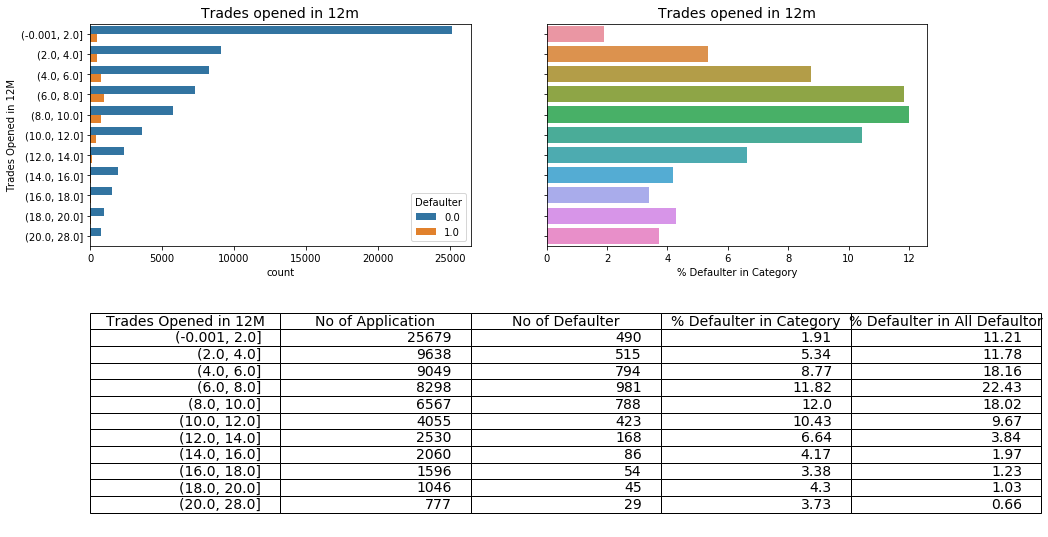

In [98]:
PlotCategoricalFeatures(woe_credit_bureau_df, 'Trades Opened in 6M', graphSize=(15,9))
PlotCategoricalFeatures(woe_credit_bureau_df, 'Trades Opened in 12M', graphSize=(15,9))

**Number of PL Trades Opened in 6M & Number of PL Trades Opened in 12M**

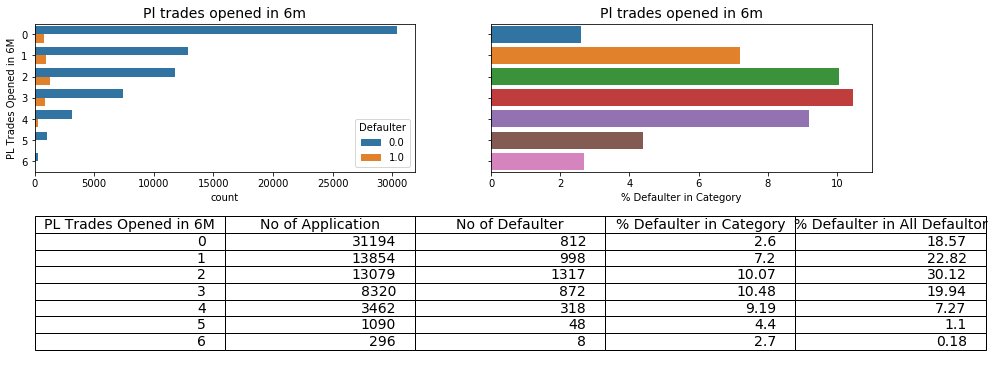

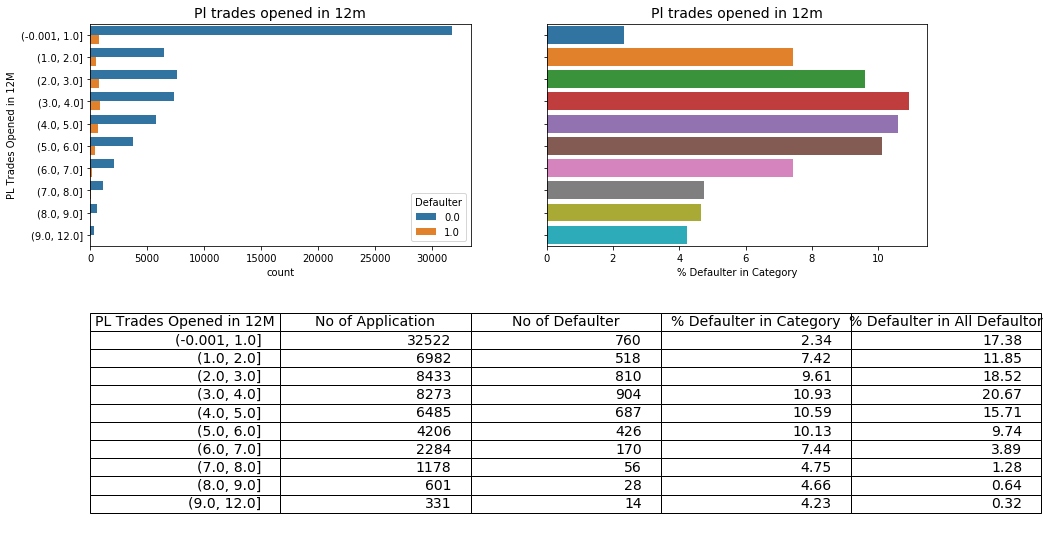

In [99]:
PlotCategoricalFeatures(woe_credit_bureau_df, 'PL Trades Opened in 6M')
PlotCategoricalFeatures(woe_credit_bureau_df, 'PL Trades Opened in 12M', graphSize=(15,9))

**Number of Inquiries in 6M & Number of Inquiries in 12M**

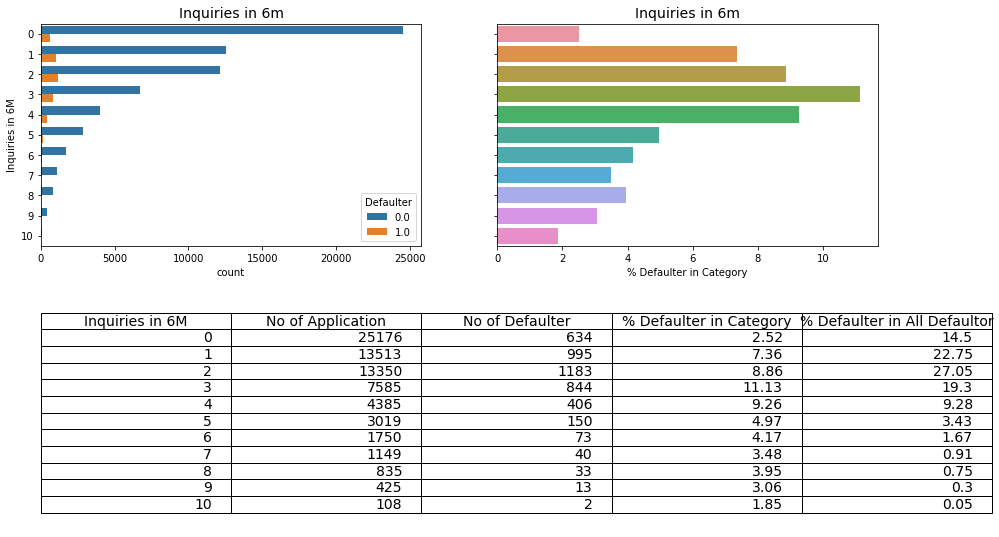

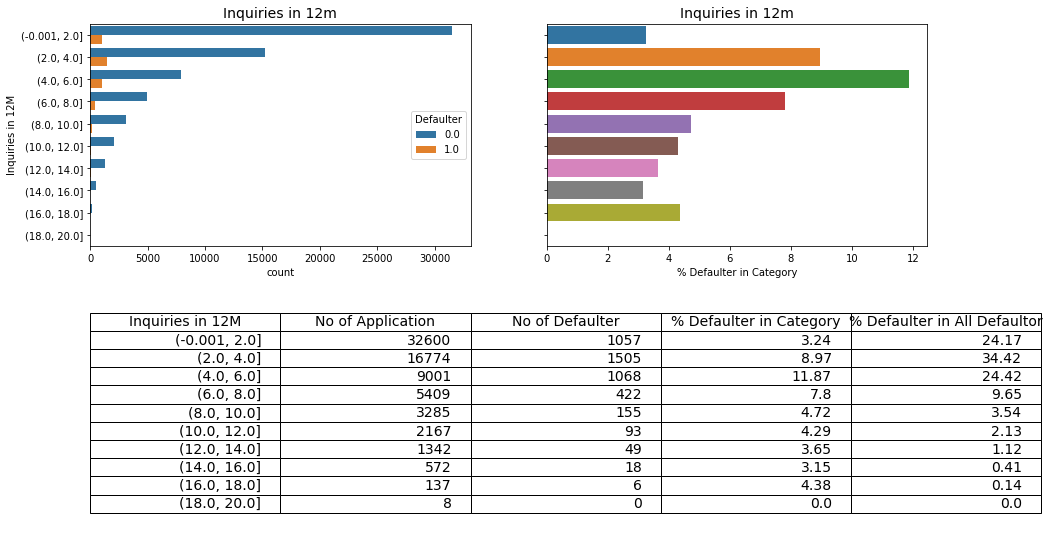

In [100]:
PlotCategoricalFeatures(woe_credit_bureau_df, 'Inquiries in 6M', graphSize=(15,9))
PlotCategoricalFeatures(woe_credit_bureau_df, 'Inquiries in 12M', graphSize=(15,9))

**Presence of Home Loan, Auto Loand (Have_Secured_Loan)**

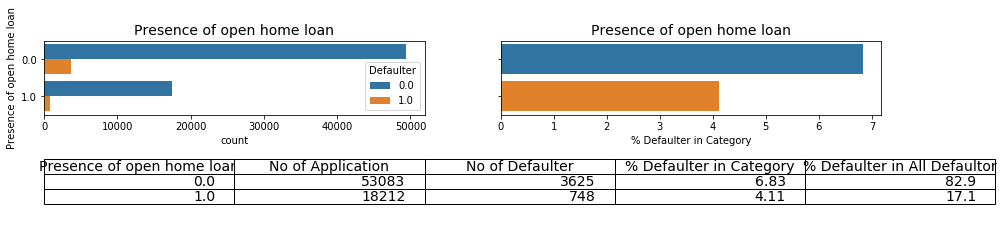

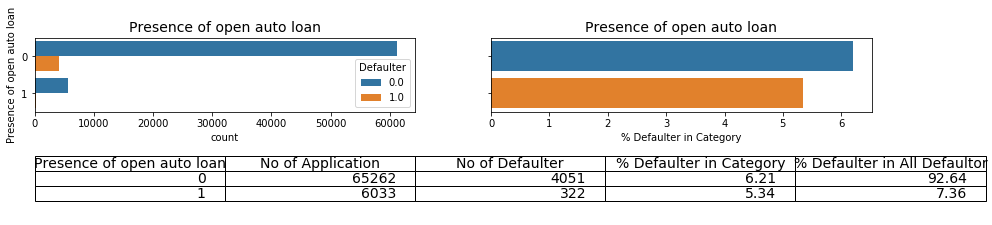

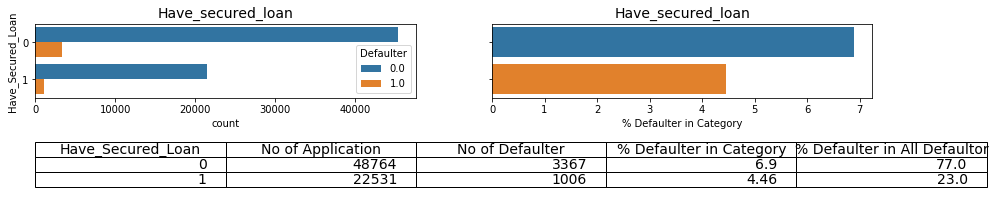

In [104]:
PlotCategoricalFeatures(woe_credit_bureau_df, 'Presence of open home loan', graphSize=(15,3), bbox=[0,0,2.5,0.6])
PlotCategoricalFeatures(woe_credit_bureau_df, 'Presence of open auto loan', graphSize=(15,3), bbox=[0,0,2.5,0.6])
PlotCategoricalFeatures(woe_credit_bureau_df, 'Have_Secured_Loan', graphSize=(15,3), bbox=[0,0,2.5,0.6])             

Applicant which having atleast one home loan or auto loan (which are nothing but secured loan) have less chance of defaulting.

**Outstanding Balance**

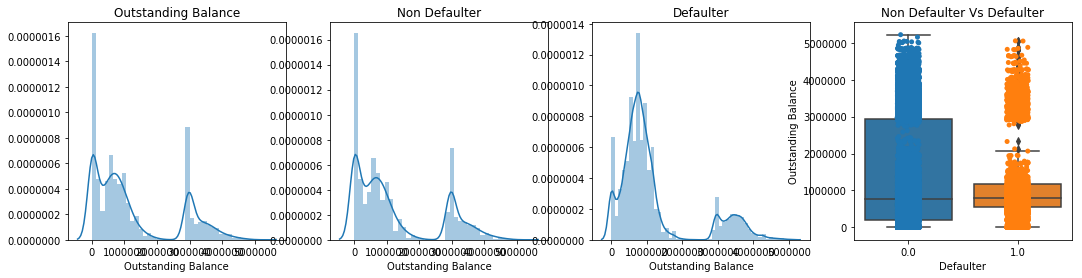

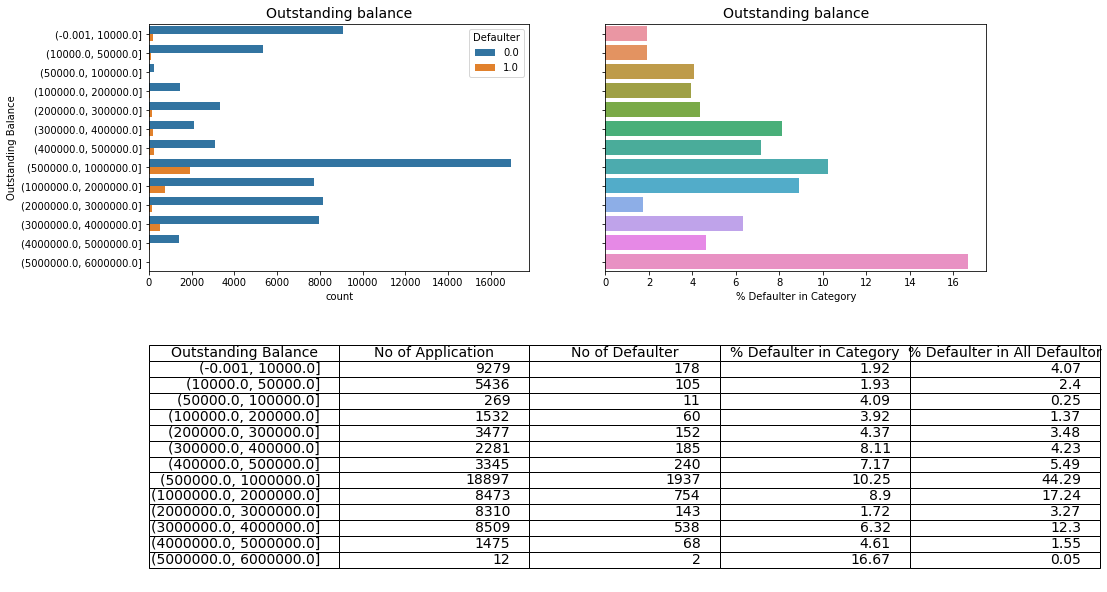

In [105]:
PlotNumericalFeatures(credit_bureau_df, 'Outstanding Balance')
PlotCategoricalFeatures(woe_credit_bureau_df, 'Outstanding Balance', graphSize=(15,10))

**Total No of Trades**

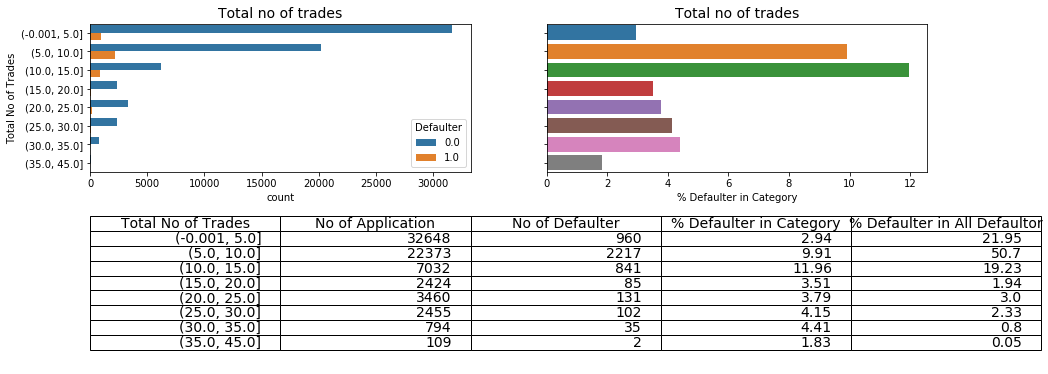

In [106]:
PlotCategoricalFeatures(woe_credit_bureau_df, 'Total No of Trades')

Let's replace original values as well as bin category with new derived woe value. 

In [107]:
#Backup of dataset
woe_demo_graph_df_bk = woe_demo_graph_df.copy()
woe_credit_bureau_df_bk = woe_credit_bureau_df.copy()

In [108]:
#Add WOE value columns to dataset
for r in range(len(woe_iv_demo_graph)):
    feature = woe_iv_demo_graph['Feature'][r]
    val = woe_iv_demo_graph['Category'][r]
    woe = woe_iv_demo_graph['WOE'][r]
    
    woe_demo_graph_df.loc[woe_demo_graph_df[feature] == val, feature + '_WOE'] = woe

#Drop origin data columns
colName = {col + '_WOE' : col for col in woe_iv_demo_graph['Feature'].unique()}
woe_demo_graph_df.drop(columns=woe_iv_demo_graph['Feature'].unique(), inplace=True)
woe_demo_graph_df.rename(columns=colName, inplace=True)    

In [109]:
for r in range(len(woe_iv_credit_bureau)):
    feature = woe_iv_credit_bureau['Feature'][r]
    val = woe_iv_credit_bureau['Category'][r]
    woe = woe_iv_credit_bureau['WOE'][r]
    
    woe_credit_bureau_df.loc[woe_credit_bureau_df[feature] == val, feature + '_WOE'] = woe

#Drop origin data columns
colName = {col + '_WOE' : col for col in woe_iv_credit_bureau['Feature'].unique()}
woe_credit_bureau_df.drop(columns=woe_iv_credit_bureau['Feature'].unique(), inplace=True)
woe_credit_bureau_df.rename(columns=colName, inplace=True)  

Merge both dataset using index (as we know there are duplicate application id).

In [110]:
demo_graph_credit_bureau_df = pd.merge(woe_demo_graph_df, woe_credit_bureau_df, left_index=True, right_index=True)

In [111]:
demo_graph_credit_bureau_df.head()

,Application ID_x,Defaulter_x,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,...,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Have_Secured_Loan
0,954457215,0.0,0.047762,-0.015853,0.011620,0.236672,0.327404,-0.048593,0.037822,-0.012369,...,1.211679,0.894027,1.004629,0.928014,0.667838,0.422415,1.316934,0.768682,-0.012715,0.335154
1,432830445,0.0,-0.123630,0.004949,0.011620,0.050214,0.595893,0.042540,0.063967,-0.012369,...,1.211679,0.894027,1.004629,0.928014,0.667838,-0.114809,1.206278,0.768682,-0.012715,-0.126655
2,941387308,0.0,-0.123630,0.004949,-0.064634,0.236672,0.368511,-0.048593,0.063967,-0.012369,...,1.211679,0.894027,1.004629,0.928014,0.667838,0.422415,-0.032372,0.768682,-0.012715,0.335154
3,392161677,0.0,0.047762,0.004949,0.011620,0.127980,0.595893,-0.048593,-0.164611,-0.012369,...,1.211679,0.894027,1.004629,0.928014,0.667838,0.422415,-0.032372,0.768682,0.147519,0.335154
4,182011211,0.0,-0.123630,-0.015853,0.011620,0.000097,0.368511,0.042540,0.037822,-0.012369,...,1.211679,0.894027,1.004629,0.928014,0.667838,0.422415,-0.032372,0.768682,-0.012715,0.335154


In [112]:
demo_graph_credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71144 entries, 0 to 71294
Data columns (total 33 columns):
Application ID_x               71144 non-null int64
Defaulter_x                    71144 non-null float64
Age                            71144 non-null float64
Gender                         71144 non-null float64
Marital Status                 71144 non-null float64
No of dependents               71144 non-null float64
Income                         71144 non-null float64
Education                      71144 non-null float64
Profession                     71144 non-null float64
Type of residence              71144 non-null float64
Months in Current Residence    71144 non-null float64
Months in Current Company      71144 non-null float64
Income_Per_Dependent           71144 non-null float64
Application ID_y               71144 non-null int64
Defaulter_y                    71144 non-null float64
90 DPD in 6M                   71144 non-null float64
60 DPD in 6M                   

In [113]:
#Drop and rename columns
demo_graph_credit_bureau_df.drop(labels=['Application ID_y', 'Defaulter_y'], axis=1, inplace=True)
demo_graph_credit_bureau_df.rename(columns={'Application ID_x' : 'Application ID', 'Defaulter_x' : 'Defaulter'}, inplace=True)

## Model Building

In [294]:
#Util
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import  Pipeline, make_pipeline

#Model Algo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm

#Model Evluation
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Will Build First Model using Applicants Demographic Data

Will first check Correlation using Heatmap 

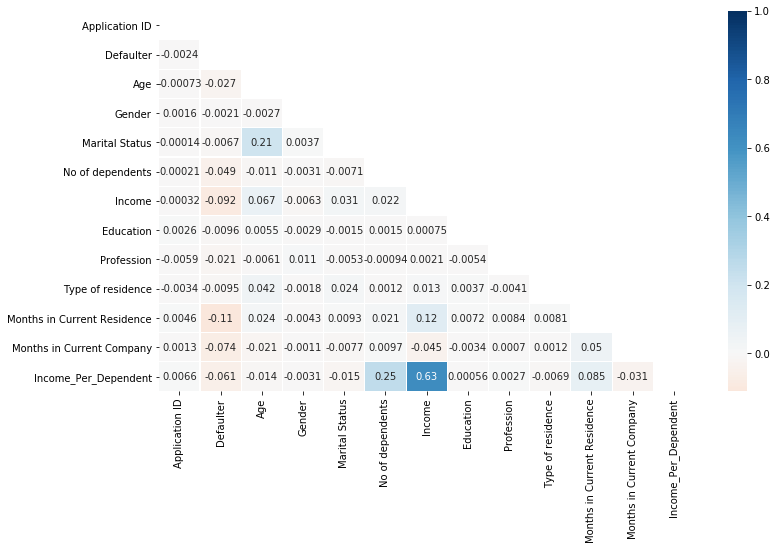

In [116]:
corr = woe_demo_graph_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,7))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

No high correlation within variables.

In [130]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial(), ).fit()
    print(lr.summary())
    return (lr, X_train_lm)

def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    return vifScore

In [495]:
def EvaluateModel(model, model_data, y_actual, threshold, display = False, isGLM = True):
    if isGLM == True:
        pred = model.predict(model_data)
    else:
        pred = model.predict_proba(model_data)[:,1]
        
    pred = pred.values if isinstance(pred, pd.Series) == True else pred
    y_actual = y_actual if isinstance(y_actual, np.ndarray) == True else y_actual.values
    
    pred_df = pd.DataFrame(data= {'Defaulted' : y_actual, 'Default_Prob':pred.reshape(-1)})

    pred_df['Default_Prob'] = round(pred_df['Default_Prob'] * 100,2)
    pred_df['Prediction'] = pred_df['Default_Prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    pred_df = pred_df.sort_values(by='Default_Prob', ascending=False)
    accuracy = round(metrics.accuracy_score(pred_df['Defaulted'], pred_df['Prediction'] ), 2)
    precision = round(metrics.precision_score(pred_df['Defaulted'], pred_df['Prediction'] ), 2)
    sensitivity = round(metrics.recall_score(pred_df['Defaulted'], pred_df['Prediction'], pos_label=1 ), 2)
    specificity  = round(metrics.recall_score(pred_df['Defaulted'], pred_df['Prediction'], pos_label=0 ), 2)
    auc = round(metrics.roc_auc_score(pred_df['Defaulted'], pred_df['Prediction'] ), 2)
    
    if display:
        print("********* " , threshold, " ***********")
        print("Accuracy : ", accuracy)
        print("Precision : ", precision)
        print("Sensitivity / Recall : ", sensitivity)
        print("Specificity : ", specificity )
        print("ROC - AUC : ", auc)
        return pred_df
    else:
        return (accuracy, precision, sensitivity, specificity, auc, pred_df)

In [477]:
def DataSampling(x, y, ratio=None):
    smote = SMOTE(random_state=100,ratio=ratio)
    temp_X_train, temp_y_train = smote.fit_sample(x, y)
    temp_X_train = pd.DataFrame(data=temp_X_train, columns=x.columns)
    return temp_X_train, temp_y_train

In [268]:
# Putting feature variable to X
X = woe_demo_graph_df.drop(columns=['Defaulter', 'Application ID'],axis=1)

# Putting response variable to y
Y = woe_demo_graph_df['Defaulter']

In [423]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100, stratify = Y)

To handel Class im balance problem will use over-sampling tecnique **SMOTE : Synthetic Minority Over-sampling Technique** 

In [424]:
X_train_sm, y_train_sm = DataSampling(X_train, y_train)

**Build Logistic Regression Model**

As per **Information Value** of Demographic data not a single variable is is strong or medium predictor. 

In [425]:
#First Logistic regression Model
lr_1, train_lm_1 = GetLRModel(X_train_sm, y_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93476
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60253.
Date:                Sun, 15 Dec 2019   Deviance:                   1.2051e+05
Time:                        15:51:33   Pearson chi2:                 9.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0022      0.007     -0.326      0.745      -0.016       0.011
A

In [426]:
X_train_sm.drop(columns=['Gender'], inplace=True)
lr_2, train_lm_2 = GetLRModel(X_train_sm, y_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93477
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60254.
Date:                Sun, 15 Dec 2019   Deviance:                   1.2051e+05
Time:                        15:51:33   Pearson chi2:                 9.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0023      0.007     -0.330      0.741      -0.016       0.011
A

In [427]:
GetVIFScore(X_train_sm)

,Features,VIF
0,Age,1.08
1,Marital Status,1.06
2,No of dependents,1.10
3,Income,1.82
4,Education,1.00
5,Profession,1.00
6,Type of residence,1.00
7,Months in Current Residence,1.04
8,Months in Current Company,1.01
9,Income_Per_Dependent,1.91


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


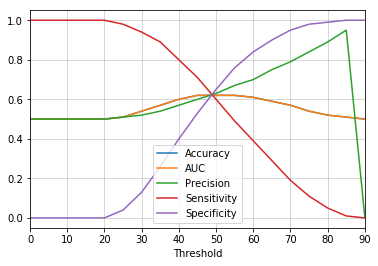

In [428]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr_2, train_lm_2, y_train_sm, i)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()

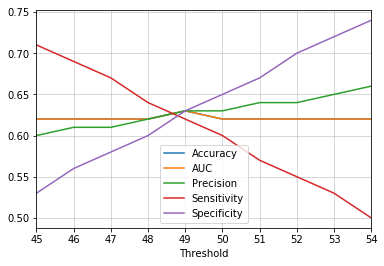

,Threshold,Accuracy,Precision,Sensitivity,Specificity,AUC
45,45.0,0.62,0.60,0.71,0.53,0.62
46,46.0,0.62,0.61,0.69,0.56,0.62
47,47.0,0.62,0.61,0.67,0.58,0.62
48,48.0,0.62,0.62,0.64,0.60,0.62
49,49.0,0.63,0.63,0.62,0.63,0.63
50,50.0,0.62,0.63,0.60,0.65,0.62
51,51.0,0.62,0.64,0.57,0.67,0.62
52,52.0,0.62,0.64,0.55,0.70,0.62
53,53.0,0.62,0.65,0.53,0.72,0.62
54,54.0,0.62,0.66,0.50,0.74,0.62


In [275]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(45, 55, 1):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr_2, train_lm_2, y_train_sm, i)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

At threshold **49** we have **0.63 & 0.62 as Precision and recall** respectivley.

Lets build and tune hyperparamenr of Logistic Regression Model using significant feature identified by GLM Model. 

In [276]:
#Using Startified K-Fold technique to handel Class Imbalance problem
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

In [482]:
lr = LogisticRegression(random_state=100)
smote = SMOTE(random_state=100)

pipeline = Pipeline([('smote', smote), ('lr',lr)])
param = {'smote__ratio' : [None,0.1,0.2,0.3,0.4],
        'lr__C' : [0.01,0.1,1,10],
        'lr__class_weight' :[None, 'balanced']
        }
lr_model_cv = GridSearchCV(pipeline, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
lr_model_cv.fit(X_train[X_train_sm.columns], y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=100, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('lr',
                                        LogisticRegress...
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',

In [483]:
lrScore = pd.DataFrame(lr_model_cv.cv_results_)
lrScore[['param_smote__ratio','param_lr__C','param_lr__class_weight','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_smote__ratio,param_lr__C,param_lr__class_weight,mean_train_score,mean_test_score
16,0.1,0.1,balanced,0.674414,0.673539
11,0.1,0.1,None,0.673904,0.673524
21,0.1,1,None,0.674288,0.673508
31,0.1,10,None,0.674307,0.673441
26,0.1,1,balanced,0.674541,0.673353
36,0.1,10,balanced,0.674543,0.673299
12,0.2,0.1,None,0.673780,0.673231
22,0.2,1,None,0.673991,0.673199
17,0.2,0.1,balanced,0.674013,0.673186
32,0.2,10,None,0.673988,0.673130


In [484]:
lr_model_cv.best_params_

{'lr__C': 0.1, 'lr__class_weight': 'balanced', 'smote__ratio': 0.1}

In [485]:
#Build Logistic regression model using hyperparameter value C = 0.01 with SMOTE ration = 0.2
lr = LogisticRegression(C=0.1, random_state=100, class_weight='balanced')
lr_X_train, lr_y_train = DataSampling(X_train[X_train_sm.columns], y_train, 0.1)
lr.fit(lr_X_train, lr_y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

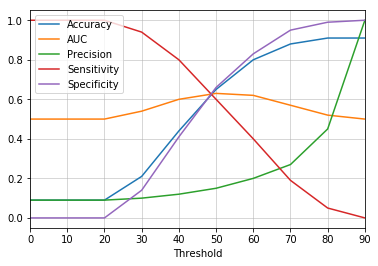

,Threshold,Accuracy,Precision,Sensitivity,Specificity,AUC
0,0.0,0.09,0.09,1.00,0.00,0.50
10,10.0,0.09,0.09,1.00,0.00,0.50
20,20.0,0.09,0.09,1.00,0.00,0.50
30,30.0,0.21,0.10,0.94,0.14,0.54
40,40.0,0.44,0.12,0.80,0.41,0.60
50,50.0,0.65,0.15,0.60,0.66,0.63
60,60.0,0.80,0.20,0.40,0.83,0.62
70,70.0,0.88,0.27,0.19,0.95,0.57
80,80.0,0.91,0.45,0.05,0.99,0.52
90,90.0,0.91,1.00,0.00,1.00,0.50


In [486]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 10):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr, lr_X_train, lr_y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

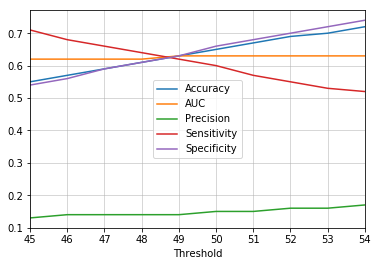

,Threshold,Accuracy,Precision,Sensitivity,Specificity,AUC
45,45.0,0.55,0.13,0.71,0.54,0.62
46,46.0,0.57,0.14,0.68,0.56,0.62
47,47.0,0.59,0.14,0.66,0.59,0.62
48,48.0,0.61,0.14,0.64,0.61,0.62
49,49.0,0.63,0.14,0.62,0.63,0.63
50,50.0,0.65,0.15,0.60,0.66,0.63
51,51.0,0.67,0.15,0.57,0.68,0.63
52,52.0,0.69,0.16,0.55,0.70,0.63
53,53.0,0.70,0.16,0.53,0.72,0.63
54,54.0,0.72,0.17,0.52,0.74,0.63


In [487]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(45, 55, 1):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr, lr_X_train, lr_y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

We are getting 0.62 as precision and recall as well as AUC is 0.63 when threshold value is 49.<BR>
So lets use 49 for final prediction and test the model performacne.  

In [496]:
customprint('**Training Data Score**')
dt_train_df = EvaluateModel(lr, X_train[X_train_sm.columns], y_train, 49, True, isGLM=False)

customprint('**Testing Data Score**')
dt_test_df = EvaluateModel(lr, X_test[X_train_sm.columns], y_test, 49, True, isGLM=False)

**Training Data Score**

*********  49  ***********
Accuracy :  0.63
Precision :  0.1
Sensitivity / Recall :  0.62
Specificity :  0.63
ROC - AUC :  0.63


**Testing Data Score**

*********  49  ***********
Accuracy :  0.63
Precision :  0.1
Sensitivity / Recall :  0.62
Specificity :  0.63
ROC - AUC :  0.63


Model is stable on Train as well as Test data.

**Random Forest**

In [514]:
rf = RandomForestClassifier(random_state=100, class_weight='balanced')
smote = SMOTE(random_state=100)
param = {'sm__ratio' : [0.1,0.2,0.3],
        'rf__n_estimators' : [20,50,100],
        'rf__max_depth': [3,5,10],
        'rf__max_features': [3,6,9],
        'rf__min_samples_leaf': [200,300,500],
        'rf__min_samples_split': [50,100]
        }
pipeline = Pipeline([('sm',smote), ('rf', rf)])
rf_model_cv = GridSearchCV(pipeline, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
rf_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 44.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sm',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=100, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('rf',
                                        RandomForestClassi...
                                                               random_state=100,
                                                               verbose=0,
                                                               warm_

In [501]:
rfScore = pd.DataFrame(rf_model_cv.cv_results_)
rfScore.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__min_samples_leaf,param_rf__min_samples_split,param_sm__ratio,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
256,0.545542,0.019947,0.027925,0.001092,10,3,500,50,0.1,"{'rf__max_depth': 10, 'rf__max_features': 3, '...",...,0.662114,0.019413,1,0.674332,0.686978,0.683747,0.672429,0.683583,0.680214,0.005741
261,0.545073,0.006677,0.028534,0.001508,10,3,500,100,0.1,"{'rf__max_depth': 10, 'rf__max_features': 3, '...",...,0.662114,0.019413,1,0.674332,0.686978,0.683747,0.672429,0.683583,0.680214,0.005741
266,0.546738,0.022367,0.028125,0.000746,10,3,500,200,0.1,"{'rf__max_depth': 10, 'rf__max_features': 3, '...",...,0.662114,0.019413,1,0.674332,0.686978,0.683747,0.672429,0.683583,0.680214,0.005741
581,0.761763,0.042543,0.030320,0.003128,20,6,600,200,0.1,"{'rf__max_depth': 20, 'rf__max_features': 6, '...",...,0.662072,0.021697,4,0.677225,0.688757,0.683971,0.676565,0.680998,0.681503,0.004509
576,0.778518,0.051787,0.028325,0.000487,20,6,600,100,0.1,"{'rf__max_depth': 20, 'rf__max_features': 6, '...",...,0.662072,0.021697,4,0.677225,0.688757,0.683971,0.676565,0.680998,0.681503,0.004509
571,0.751790,0.028956,0.029123,0.002476,20,6,600,50,0.1,"{'rf__max_depth': 20, 'rf__max_features': 6, '...",...,0.662072,0.021697,4,0.677225,0.688757,0.683971,0.676565,0.680998,0.681503,0.004509
331,0.759968,0.021823,0.029523,0.002720,10,6,600,50,0.1,"{'rf__max_depth': 10, 'rf__max_features': 6, '...",...,0.661997,0.021572,7,0.677225,0.688757,0.683971,0.676488,0.680998,0.681488,0.004526
336,0.750594,0.030562,0.029522,0.001019,10,6,600,100,0.1,"{'rf__max_depth': 10, 'rf__max_features': 6, '...",...,0.661997,0.021572,7,0.677225,0.688757,0.683971,0.676488,0.680998,0.681488,0.004526
341,0.841551,0.031630,0.037899,0.004137,10,6,600,200,0.1,"{'rf__max_depth': 10, 'rf__max_features': 6, '...",...,0.661997,0.021572,7,0.677225,0.688757,0.683971,0.676488,0.680998,0.681488,0.004526
506,0.559504,0.021520,0.027925,0.001411,20,3,500,200,0.1,"{'rf__max_depth': 20, 'rf__max_features': 3, '...",...,0.661926,0.020023,10,0.674332,0.686989,0.683786,0.672363,0.683694,0.680233,0.005779


In [516]:
print(rf_model_cv.best_score_)
rf_model_cv.best_params_

0.6646165560857571


{'rf__max_depth': 10,
 'rf__max_features': 3,
 'rf__min_samples_leaf': 200,
 'rf__min_samples_split': 50,
 'rf__n_estimators': 100,
 'sm__ratio': 0.1}

In [517]:
#Build Logistic regression model using hyperparameter value C = 0.01 with SMOTE ration = 0.2
rf = RandomForestClassifier(random_state=100, 
                            class_weight='balanced',
                            n_estimators = 100,
                            max_depth=10,
                            max_features=3,
                            min_samples_leaf=200,
                            min_samples_split=50,
                           )
rf_X_train, rf_y_train = DataSampling(X_train, y_train, 0.1)
rf.fit(rf_X_train, rf_y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


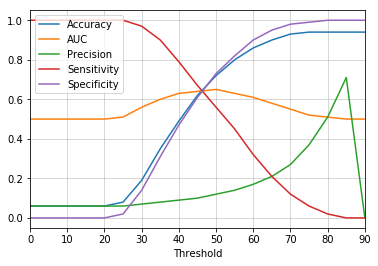

,Threshold,Accuracy,Precision,Sensitivity,Specificity,AUC
0,0.0,0.06,0.06,1.00,0.00,0.50
5,5.0,0.06,0.06,1.00,0.00,0.50
10,10.0,0.06,0.06,1.00,0.00,0.50
15,15.0,0.06,0.06,1.00,0.00,0.50
20,20.0,0.06,0.06,1.00,0.00,0.50
25,25.0,0.08,0.06,1.00,0.02,0.51
30,30.0,0.19,0.07,0.97,0.14,0.56
35,35.0,0.35,0.08,0.90,0.31,0.60
40,40.0,0.49,0.09,0.79,0.47,0.63
45,45.0,0.62,0.10,0.67,0.61,0.64


In [518]:
modelPerf_rf = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(rf, X_train, y_train, i, isGLM=False)
    modelPerf_rf.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]
    
modelPerf_rf.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_rf

Sensitivity & Specificity of model using demographic data is not good which is 0.63

### Build model using Demoraphic & Credit Bureau data

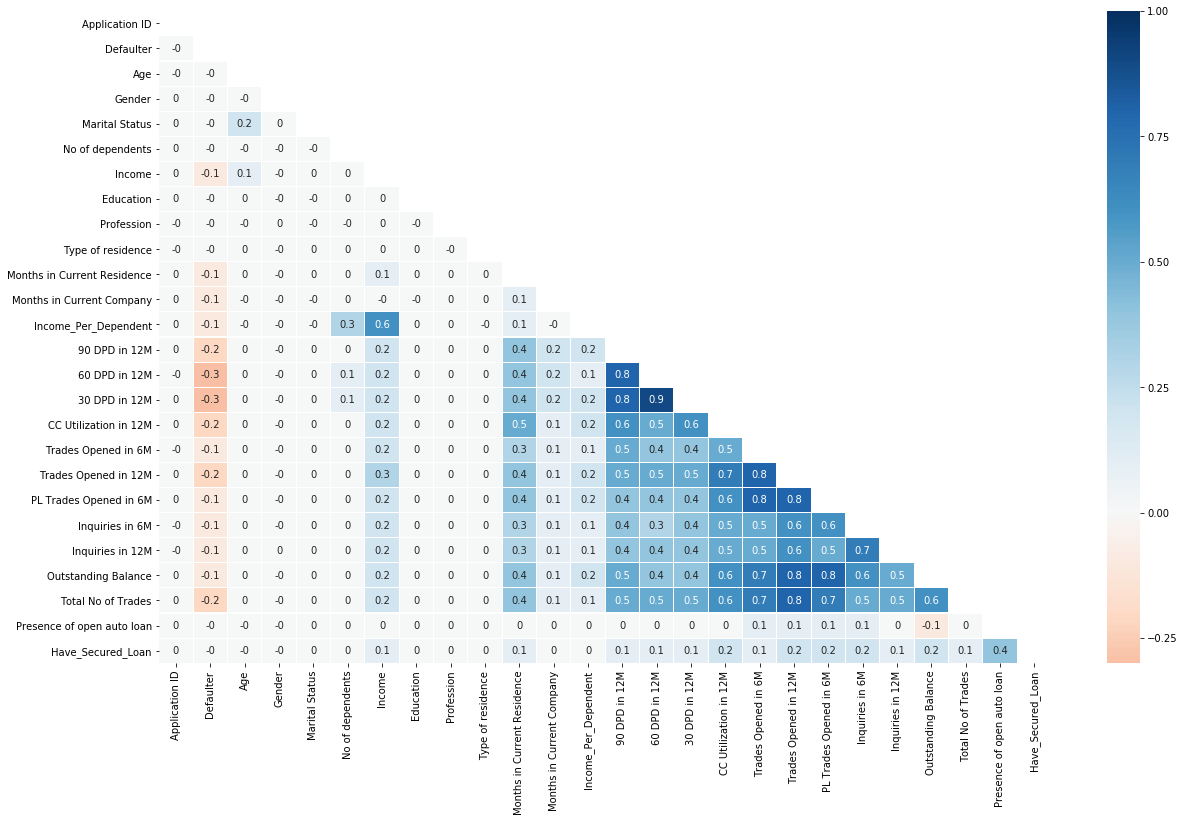

In [529]:
corr = round(demo_graph_credit_bureau_df.corr(),1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

High collinearity between independent variables in data set.<BR>
Will drop variable with more than 80% collinear to each other.

In [528]:
colstoDrop = ['Presence of open home loan', 'PL Trades Opened in 12M', '30 DPD in 6M', '60 DPD in 6M', '90 DPD in 6M',]
demo_graph_credit_bureau_df.drop(labels=colstoDrop, axis=1, inplace=True)

In [532]:
# Putting feature variable to X
X = demo_graph_credit_bureau_df.drop(columns=['Defaulter', 'Application ID'],axis=1)

# Putting response variable to y
Y = demo_graph_credit_bureau_df['Defaulter']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100, stratify = Y)

### Feature Selection
Will use RFE (Recursive Feature Elimination) technique to select most important features.

In [543]:
lr = LogisticRegression(class_weight='balanced')
lr_X_train, lr_y_train = DataSampling(X_train, y_train)
lr.fit(lr_X_train, lr_y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [544]:
rfe = RFE(lr, 15)
rfe = rfe.fit(lr_X_train, lr_y_train)
dfRFE = pd.DataFrame(data=np.array([lr_X_train.columns, rfe.support_, rfe.ranking_]).T, columns=['Feature', 'Support', 'Rank'])
dfRFE.sort_values(by='Rank')

,Feature,Support,Rank
0,Age,True,1
18,Inquiries in 6M,True,1
17,PL Trades Opened in 6M,True,1
14,CC Utilization in 12M,True,1
13,30 DPD in 12M,True,1
22,Presence of open auto loan,True,1
9,Months in Current Company,True,1
23,Have_Secured_Loan,True,1
6,Profession,True,1
5,Education,True,1


In [545]:
cols  = list(dfRFE[dfRFE['Rank'] == 1]['Feature'])
lr_X_train = lr_X_train[cols]

In [546]:
#Check VIF Score : For Multi-Collinearity
GetVIFScore(lr_X_train)

,Features,VIF
0,Age,1.07
1,Gender,1.00
2,Marital Status,1.05
3,No of dependents,1.03
4,Income,1.17
5,Education,1.00
6,Profession,1.01
7,Type of residence,1.00
8,Months in Current Company,1.09
9,30 DPD in 12M,1.73


In [547]:
lr_1, train_lm_1 = GetLRModel(lr_X_train, lr_y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93472
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53777.
Date:                Sun, 15 Dec 2019   Deviance:                   1.0755e+05
Time:                        21:17:54   Pearson chi2:                 9.26e+04
No. Iterations:                     4   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0136      0.007     -1.831      0.067      -0.028       0.001
Age 

In [548]:
lr_X_train.drop(labels='Gender', axis=1, inplace=True)
lr_2, train_lm_2 = GetLRModel(lr_X_train, lr_y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93473
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53777.
Date:                Sun, 15 Dec 2019   Deviance:                   1.0755e+05
Time:                        21:18:06   Pearson chi2:                 9.26e+04
No. Iterations:                     4   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0137      0.007     -1.834      0.067      -0.028       0.001
Age 

In [541]:
lr_X_train.drop(labels='Trades Opened in 6M', axis=1, inplace=True)
lr_3, train_lm_3 = GetLRModel(lr_X_train, lr_y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93465
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53631.
Date:                Sun, 15 Dec 2019   Deviance:                   1.0726e+05
Time:                        21:15:19   Pearson chi2:                 9.25e+04
No. Iterations:                     4   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0140      0.007     -1.880      0.060      -0.029       0.001
A

In [542]:
lr_X_train.drop(labels='Gender', axis=1, inplace=True)
lr_4, train_lm_4 = GetLRModel(lr_X_train, lr_y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                93488
Model:                            GLM   Df Residuals:                    93466
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53631.
Date:                Sun, 15 Dec 2019   Deviance:                   1.0726e+05
Time:                        21:15:45   Pearson chi2:                 9.25e+04
No. Iterations:                     4   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0141      0.007     -1.883      0.060      -0.029       0.001
A

In [549]:
GetVIFScore(lr_X_train)

,Features,VIF
0,Age,1.07
1,Marital Status,1.05
2,No of dependents,1.03
3,Income,1.17
4,Education,1.00
5,Profession,1.01
6,Type of residence,1.00
7,Months in Current Company,1.09
8,30 DPD in 12M,1.73
9,CC Utilization in 12M,2.09


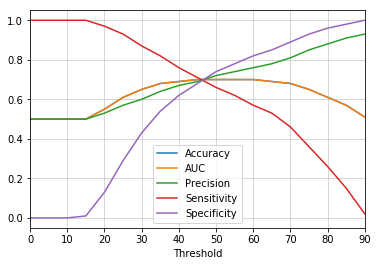

In [550]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr_2, train_lm_2, y_train_sm, i)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()

In [551]:
lr = LogisticRegression(random_state=100)
smote = SMOTE(random_state=100)

pipeline = Pipeline([('smote', smote), ('lr',lr)])
param = {'smote__ratio' : [None,0.1,0.2,0.3,0.4],
        'lr__C' : [0.01,0.1,1,10],
        'lr__class_weight' :[None, 'balanced']
        }
lr_model_cv = GridSearchCV(pipeline, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
lr_model_cv.fit(X_train[lr_X_train.columns], y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=100, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('lr',
                                        LogisticRegress...
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',

In [552]:

lrScore = pd.DataFrame(lr_model_cv.cv_results_)
lrScore[['param_smote__ratio','param_lr__C','param_lr__class_weight','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_smote__ratio,param_lr__C,param_lr__class_weight,mean_train_score,mean_test_score
6,0.1,0.01,balanced,0.767629,0.766589
7,0.2,0.01,balanced,0.767609,0.766534
9,0.4,0.01,balanced,0.767528,0.766386
8,0.3,0.01,balanced,0.767557,0.766372
2,0.2,0.01,None,0.767116,0.766367
0,None,0.01,None,0.767530,0.766357
5,None,0.01,balanced,0.767530,0.766357
4,0.4,0.01,None,0.767318,0.766338
16,0.1,0.1,balanced,0.767682,0.766292
17,0.2,0.1,balanced,0.767648,0.766269


In [554]:
lr_model_cv.best_params_

{'lr__C': 0.01, 'lr__class_weight': 'balanced', 'smote__ratio': 0.1}

In [555]:
#Build Logistic regression model using hyperparameter value C = 0.01 with SMOTE ration = 0.2
lr = LogisticRegression(C=0.01, random_state=100, class_weight='balanced')
lr_X_train, lr_y_train = DataSampling(X_train[lr_X_train.columns], y_train, 0.1)
lr.fit(lr_X_train, lr_y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

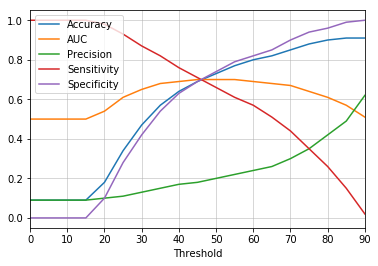

In [557]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(lr, lr_X_train, lr_y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]

modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()

In [559]:
customprint('**Training Data Score**')
dt_train_df = EvaluateModel(lr, X_train[lr_X_train.columns], y_train, 45, True, isGLM=False)

customprint('**Testing Data Score**')
dt_test_df = EvaluateModel(lr, X_test[lr_X_train.columns], y_test, 45, True, isGLM=False)

**Training Data Score**

*********  45  ***********
Accuracy :  0.69
Precision :  0.13
Sensitivity / Recall :  0.71
Specificity :  0.69
ROC - AUC :  0.7


**Testing Data Score**

*********  45  ***********
Accuracy :  0.69
Precision :  0.13
Sensitivity / Recall :  0.69
Specificity :  0.69
ROC - AUC :  0.69


**Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=100, class_weight='balanced')
smote = SMOTE(random_state=100)
param = {'sm__ratio' : [0.1,0.2],
        'rf__n_estimators' : [20,50],
        'rf__max_depth': [3,5,10],
        'rf__max_features': [5,10,13],
        'rf__min_samples_leaf': [200,300,500],
        'rf__min_samples_split': [50,100]
        }
pipeline = Pipeline([('sm',smote), ('rf', rf)])
rf_model_cv = GridSearchCV(pipeline, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
rf_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min


In [ ]:
print(rf_model_cv.best_score_)
rf_model_cv.best_params_

In [ ]:
#Build Logistic regression model using hyperparameter value C = 0.01 with SMOTE ration = 0.2
rf = RandomForestClassifier(random_state=100, 
                            class_weight='balanced',
                            n_estimators = 100,
                            max_depth=10,
                            max_features=3,
                            min_samples_leaf=200,
                            min_samples_split=50,
                           )
rf_X_train, rf_y_train = DataSampling(X_train, y_train, 0.1)
rf.fit(rf_X_train, rf_y_train)

In [ ]:
modelPerf_rf = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(rf, X_train, y_train, i, isGLM=False)
    modelPerf_rf.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]
    
modelPerf_rf.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_rf

**Support Vector Machine**

In [ ]:
svc = SVC()
smote = SMOTE(randon_state=100)
pipeline = Pipeline([('sm',smote), ('svc', svc)])
param = {'sm__ratio' : [None, 0.1,0.2,0.3,0.4],
        'svc__kernal' : ['linear', 'poly', 'rbf']
        'svc__C' : [0.01, 0.1, 1, 10],
        'svc__gamma': [0.01, 0.1, 1]}

svc_model_cv = GridSearchCV(pipeline, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
svc_model_cv.fit(X_train, y_train)

In [ ]:
modelPerf_svc = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, sensitivity, specificity, auc, df = EvaluateModel(rf, X_train, y_train, i, isGLM=False)
    modelPerf_svc.loc[i] = [i, accuracy, precision, sensitivity, specificity, auc]
    
modelPerf_svc.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_svc

In [ ]:
from sklearn.model_selection import cross_val_score
s = SMOTE(random_state=100, ratio=0.7)
#t_x,t_y=s.fit(X_train, y_train)
imba_pipeline = make_pipeline( SMOTE(random_state=42),
                              LogisticRegression(random_state=100))
print(cross_val_score(imba_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

new_params = {'logisticregression__C':[0.1,1,10],
             'smote__ratio' : [0.2,0.3]}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring='precision',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);
grid_imba.best_score_